# Historical weather data - Zagreb, Croatia

### Import required packages

In [1289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import skew, kurtosis
import scipy.stats
%matplotlib inline

In [1290]:
# Set LaTex font for graphs
# matplotlib.rcParams['text.usetex']=True
params = {"text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
# Define colormap
my_cmap = plt.get_cmap("jet")
# Calculate colormap values
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

### Read CSV data into Pandas dataframe

In [1291]:
# Read CSV data into dataframe
data = pd.read_csv("weather_data_zagreb.csv")

# Convert string time to datetime object
data['time'] = pd.to_datetime(data['time'])

# Drop all NaN values
data = data.dropna()

# Print dataframe
data

,time,weathercode (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
1,1940-01-02,3.0,-5.2,-11.8,-8.4,-9.6,-16.3,-12.9,1940-01-02T08:37,1940-01-02T17:22,0.0,0.0,0.00,0.0,8.4,20.5,51.0,6.56,0.53
2,1940-01-03,2.0,-4.7,-17.2,-11.5,-9.5,-22.0,-16.2,1940-01-03T08:37,1940-01-03T17:23,0.0,0.0,0.00,0.0,9.7,25.2,225.0,6.15,0.46
3,1940-01-04,71.0,-2.9,-10.7,-6.8,-6.5,-14.9,-10.8,1940-01-04T08:37,1940-01-04T17:24,0.6,0.0,0.42,6.0,7.3,16.6,347.0,2.92,0.28
4,1940-01-05,3.0,-0.0,-3.7,-2.0,-4.5,-7.3,-6.0,1940-01-05T08:37,1940-01-05T17:25,0.0,0.0,0.00,0.0,8.7,21.2,14.0,4.92,0.63
5,1940-01-06,1.0,0.5,-2.6,-1.1,-3.3,-6.4,-5.0,1940-01-06T08:36,1940-01-06T17:26,0.0,0.0,0.00,0.0,8.2,15.1,15.0,5.61,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30509,2023-07-13,63.0,29.1,19.7,23.6,34.1,20.6,26.2,2023-07-13T05:18,2023-07-13T20:44,26.3,26.3,0.00,9.0,15.5,34.9,8.0,18.45,3.73
30510,2023-07-14,2.0,27.9,16.4,22.4,29.8,18.1,24.7,2023-07-14T05:19,2023-07-14T20:44,0.0,0.0,0.00,0.0,8.3,20.5,77.0,26.88,5.19
30511,2023-07-15,0.0,32.3,20.6,26.3,35.7,22.4,29.2,2023-07-15T05:20,2023-07-15T20:43,0.0,0.0,0.00,0.0,7.0,16.9,178.0,27.58,5.75
30512,2023-07-16,0.0,33.0,19.2,27.0,36.7,21.0,30.1,2023-07-16T05:21,2023-07-16T20:42,0.0,0.0,0.00,0.0,11.2,25.2,121.0,26.20,5.83


### White Christmas years

#### Years in which there was a snowfall on a Christmas day

In [1292]:
# Filter only Christmas dates which include snowfall values larger than zero
white_christmas_years = data[(data["time"].dt.day == 25) & (data["time"].dt.month == 12) & (data["snowfall_sum (cm)"] != 0.0)].reset_index(drop=True)
# Create dataframe copy which contains only two columns
white_christmas_years = white_christmas_years[["time", "snowfall_sum (cm)"]].copy()
# Print dataframe
white_christmas_years

,time,snowfall_sum (cm)
0,1940-12-25,7.56
1,1943-12-25,1.96
2,1959-12-25,0.28
3,1961-12-25,0.35
4,1965-12-25,3.57
5,1969-12-25,0.07
6,1970-12-25,7.14
7,1981-12-25,0.56
8,1982-12-25,3.85
9,1984-12-25,4.48


#### Minimum, maximum and average temperatures on a Christmas day for a period from 1940 to 2022

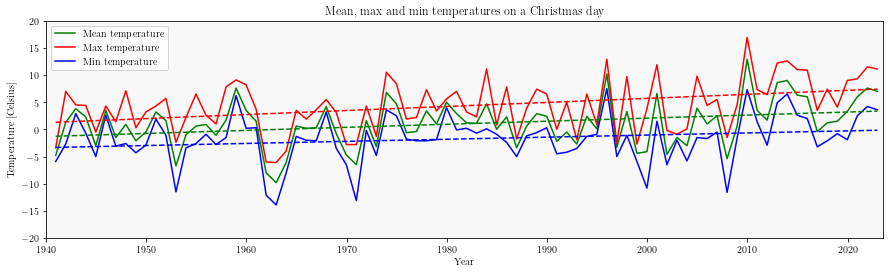

In [1293]:
# Filter out Christmas data
christmas_data = data[(data["time"].dt.day == 25) & (data["time"].dt.month == 12)].reset_index(drop=True)

plt.figure().set_figwidth(15)

# Plot minimum, maximum and average temperatures on a Christmas day
plt.plot(christmas_data["time"], christmas_data["temperature_2m_mean (°C)"], label="Mean temperature", color="green", linestyle="-")
plt.plot(christmas_data["time"], christmas_data["temperature_2m_max (°C)"], label="Max temperature", color="red", linestyle="-")
plt.plot(christmas_data["time"], christmas_data["temperature_2m_min (°C)"], label="Min temperature", color="blue", linestyle="-")

# Set xlabel and ylabel names
plt.xlabel("Year")
plt.ylabel("Temperature [Celsius]")

# Set limits of x and y labels
plt.xlim([dt.date(1940, 1, 1), dt.date(2023, 7, 13)])
plt.ylim(-20, 20)

# Plot legends
plt.legend()

# Calculate linear trendlines
z_mean = np.polyfit(christmas_data["time"].dt.year, christmas_data["temperature_2m_mean (°C)"], 1)
p_mean = np.poly1d(z_mean)
z_max = np.polyfit(christmas_data["time"].dt.year, christmas_data["temperature_2m_max (°C)"], 1)
p_max = np.poly1d(z_max)
z_min = np.polyfit(christmas_data["time"].dt.year, christmas_data["temperature_2m_min (°C)"], 1)
p_min = np.poly1d(z_min)

# Plot trendlines
plt.plot(christmas_data["time"], p_mean(christmas_data["time"].dt.year), color="green", linestyle="--")
plt.plot(christmas_data["time"], p_max(christmas_data["time"].dt.year), color="red", linestyle="--")
plt.plot(christmas_data["time"], p_min(christmas_data["time"].dt.year), color="blue", linestyle="--")

plt.title("Mean, max and min temperatures on a Christmas day")
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to pdf file
plt.savefig('christmas_temperatures.pdf', bbox_inches='tight')

#### Years with snowfall during the period of 10 days before Christmas

In [1294]:
# Filter out all the years with the snowfall in the period from December 15th to December 25th
snowfall_before_christmas_years = data[(data["time"].dt.day >= 15) & (data["time"].dt.day <= 25) & (data["time"].dt.month == 12) & (data["snowfall_sum (cm)"] != 0.0)].reset_index(drop=True)
# Create three-column dataframe
snowfall_before_christmas_years = snowfall_before_christmas_years[["time", "temperature_2m_mean (°C)", "snowfall_sum (cm)"]].copy()
# Print dataframe
snowfall_before_christmas_years

,time,temperature_2m_mean (°C),snowfall_sum (cm)
0,1940-12-22,-13.4,0.98
1,1940-12-23,-8.2,2.87
2,1940-12-24,-7.5,7.49
3,1940-12-25,-4.8,7.56
4,1941-12-18,2.4,7.84
...,...,...,...
178,2017-12-18,-0.4,0.07
179,2017-12-21,1.1,0.07
180,2018-12-15,-0.1,1.40
181,2020-12-25,6.0,0.28


## Hot days in Zagreb

#### Get all days with max temperature larger than given threshold value

In [1295]:
# Define threshold temperature value
max_threshold_temp_value = 33

# Filter out days with maximum temperature values larger than threshold value
hot_days = data[data["temperature_2m_max (°C)"] >= max_threshold_temp_value].reset_index(drop=True)
# Print dataframe
hot_days

,time,weathercode (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
0,1943-08-21,0.0,34.4,16.4,26.1,35.5,16.7,27.1,1943-08-21T06:03,1943-08-21T19:55,0.0,0.0,0.0,0.0,6.5,14.4,273.0,23.77,5.01
1,1943-08-22,0.0,34.0,15.9,25.6,34.3,16.1,26.1,1943-08-22T06:04,1943-08-22T19:53,0.0,0.0,0.0,0.0,8.6,23.0,235.0,23.71,5.35
2,1945-07-26,1.0,33.0,19.7,26.8,34.8,20.7,28.2,1945-07-26T05:32,1945-07-26T20:32,0.0,0.0,0.0,0.0,7.0,19.8,120.0,26.09,5.63
3,1945-07-27,1.0,34.0,19.0,26.5,35.4,20.7,27.8,1945-07-27T05:33,1945-07-27T20:31,0.0,0.0,0.0,0.0,9.9,30.6,240.0,24.85,5.72
4,1945-07-28,0.0,35.1,19.5,27.2,36.3,20.8,28.4,1945-07-28T05:35,1945-07-28T20:30,0.0,0.0,0.0,0.0,13.6,27.4,236.0,26.11,6.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,2023-07-10,1.0,33.8,20.4,27.3,36.6,22.5,30.1,2023-07-10T05:16,2023-07-10T20:46,0.0,0.0,0.0,0.0,7.9,17.3,177.0,26.39,5.81
339,2023-07-11,51.0,33.0,19.9,27.6,37.6,22.6,31.2,2023-07-11T05:17,2023-07-11T20:46,0.1,0.1,0.0,1.0,6.7,17.3,248.0,25.22,5.36
340,2023-07-12,51.0,34.3,21.0,27.7,36.0,22.6,29.6,2023-07-12T05:18,2023-07-12T20:45,0.1,0.1,0.0,1.0,17.5,41.4,249.0,24.26,6.15
341,2023-07-16,0.0,33.0,19.2,27.0,36.7,21.0,30.1,2023-07-16T05:21,2023-07-16T20:42,0.0,0.0,0.0,0.0,11.2,25.2,121.0,26.20,5.83


#### Get a total number of hot days per year

In [1296]:
# Get a total number of hot days per each year
total_num_of_hot_days_per_year = hot_days.groupby(hot_days["time"].dt.year)["time"].count()
# Print the total number of hot days per each year
total_num_of_hot_days_per_year

time
1943     2
1945     7
1946    14
1947     3
1949     5
1950    16
1951     1
1952    12
1956     1
1957     8
1958     6
1961     2
1963     1
1965     1
1967     1
1968     2
1970     2
1971     1
1979     1
1980     1
1981     1
1983     7
1984     2
1987     3
1988    13
1992    15
1993     8
1994     4
1997     1
1998     5
1999     2
2000    11
2001     9
2002     1
2003    13
2005     3
2006     3
2007    14
2008     2
2009     5
2010     6
2011    12
2012    25
2013    16
2015    15
2016     3
2017    18
2018     1
2019     2
2020     1
2021    16
2022    13
2023     6
Name: time, dtype: int64

#### Plot the total number of hot days for each year

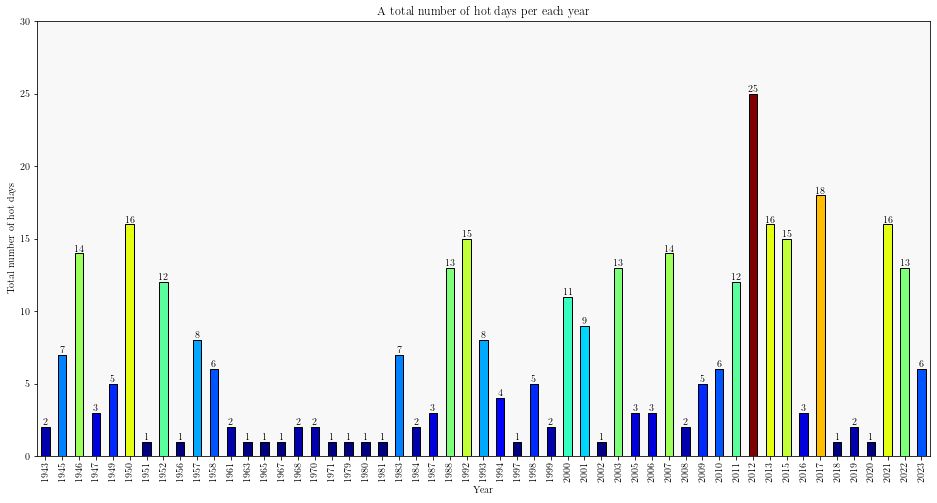

In [1297]:
# Plot a total number of hot days per each year
plot = total_num_of_hot_days_per_year.plot(kind="bar", figsize=(16,8), xlabel="Year", ylabel="Total number of hot days", legend=False, ylim=(0,30), color=my_cmap(rescale(total_num_of_hot_days_per_year)), edgecolor="black")
plt.title("A total number of hot days per each year")
plt.bar_label(container=plot.containers[0])
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to pdf file
plt.savefig('total_num_of_hot_days_per_each_year.pdf', bbox_inches='tight')

#### Get a total number of years with at least one hot day

In [1298]:
# Get a total number of years with at least one hot day
total_num_of_years_with_at_least_one_hot_day = total_num_of_hot_days_per_year.size
# Print out the value
print("A total number of years with at least one hot day:", total_num_of_years_with_at_least_one_hot_day)

A total number of years with at least one hot day: 53


#### Get a total number of years without any hot day

In [1299]:
# Get a total number of years without any hot day
total_num_of_years_without_any_hot_day = len(data["time"].dt.year.unique()) - total_num_of_years_with_at_least_one_hot_day
# Print out the value
print("A total number of years without any hot day:", total_num_of_years_without_any_hot_day)

A total number of years without any hot day: 31


#### Total number of hot days per each decade

In [1300]:
# Data by decades
_40s = data[(data["time"].dt.year >= 1940) & (data["time"].dt.year <= 1949)]
_50s = data[(data["time"].dt.year >= 1950) & (data["time"].dt.year <= 1959)]
_60s = data[(data["time"].dt.year >= 1960) & (data["time"].dt.year <= 1969)]
_70s = data[(data["time"].dt.year >= 1970) & (data["time"].dt.year <= 1979)]
_80s = data[(data["time"].dt.year >= 1980) & (data["time"].dt.year <= 1989)]
_90s = data[(data["time"].dt.year >= 1990) & (data["time"].dt.year <= 1999)]
_00s = data[(data["time"].dt.year >= 2000) & (data["time"].dt.year <= 2009)]
_10s = data[(data["time"].dt.year >= 2010) & (data["time"].dt.year <= 2019)]
_20s = data[(data["time"].dt.year >= 2020) & (data["time"].dt.year <= 2029)]

In [1301]:
# Store a total number of hot days in each decade into dictionary
total_num_of_hot_days_per_decade = {
    "1940-1949": _40s[_40s["temperature_2m_max (°C)"] >= max_threshold_temp_value]["temperature_2m_max (°C)"].count(),
    "1950-1959": _50s[_50s["temperature_2m_max (°C)"] >= max_threshold_temp_value]["temperature_2m_max (°C)"].count(),
    "1960-1969": _60s[_60s["temperature_2m_max (°C)"] >= max_threshold_temp_value]["temperature_2m_max (°C)"].count(),
    "1970-1979": _70s[_70s["temperature_2m_max (°C)"] >= max_threshold_temp_value]["temperature_2m_max (°C)"].count(),
    "1980-1989": _80s[_80s["temperature_2m_max (°C)"] >= max_threshold_temp_value]["temperature_2m_max (°C)"].count(),
    "1990-1999": _90s[_90s["temperature_2m_max (°C)"] >= max_threshold_temp_value]["temperature_2m_max (°C)"].count(),
    "2000-2009": _00s[_00s["temperature_2m_max (°C)"] >= max_threshold_temp_value]["temperature_2m_max (°C)"].count(),
    "2010-2019": _10s[_10s["temperature_2m_max (°C)"] >= max_threshold_temp_value]["temperature_2m_max (°C)"].count(),
    "2020-2029": _20s[_20s["temperature_2m_max (°C)"] >= max_threshold_temp_value]["temperature_2m_max (°C)"].count()
}

# Convert dictionary to dataframe
total_num_of_hot_days_per_decade = pd.DataFrame.from_dict([total_num_of_hot_days_per_decade]).transpose().rename(columns={0: "Total number of hot days"})
total_num_of_hot_days_per_decade

,Total number of hot days
1940-1949,31
1950-1959,44
1960-1969,7
1970-1979,4
1980-1989,27
1990-1999,35
2000-2009,61
2010-2019,98
2020-2029,36


#### Plot a total number of hot days per decade

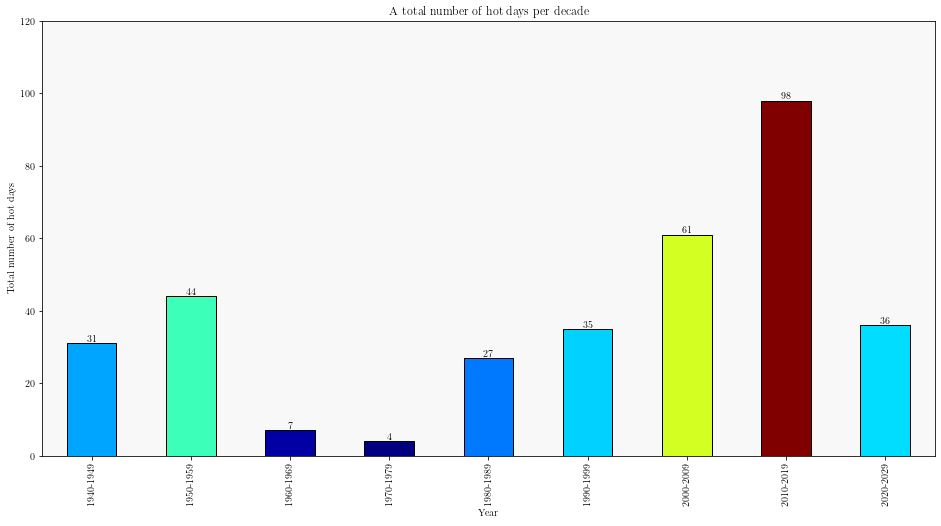

In [1302]:
# Plot a total number of hot days per decade
plot = total_num_of_hot_days_per_decade["Total number of hot days"].plot(kind="bar", figsize=(16,8), xlabel="Year", ylabel="Total number of hot days", legend=False, ylim=(0,120), color=my_cmap(rescale(total_num_of_hot_days_per_decade["Total number of hot days"])), edgecolor="black")
plt.title("A total number of hot days per decade")
plt.bar_label(container=plot.containers[0])
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to pdf file
plt.savefig('total_num_of_hot_days_per_decades.pdf', bbox_inches='tight')

## Heatwaves in Zagreb

#### Create heatwaves dataframe that stores only heatwave data (three or more consecutive days with max temperatures larger than given threshold value)

In [1303]:
# Every time we see a date with a difference greater than a day, we add a value to that date. 
# Otherwise it remains with the previous value so that we end up with a unique identifier per group.
hot_days['grp_date'] = hot_days["time"].diff().dt.days.ne(1).cumsum()

In [1304]:
# Calculate the total number of consecutive hot days by counting the equal grp_date values
num_of_consecutive_hot_days = hot_days.groupby('grp_date')['grp_date'].count()

In [1305]:
# Join dataframes on grp_date column values
df = hot_days.join(num_of_consecutive_hot_days, on="grp_date", lsuffix="", rsuffix="_total_number")
# Consider only that days with number larger than 3, i.e. we shall assume that heatwaves occur when 3 
# or more days are hotter than given threshold value.
heat_waves = df[df["grp_date_total_number"] >= 3].reset_index(drop=True)
# Print heatwaves dataframe
heat_waves

,time,weathercode (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),...,rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm),grp_date,grp_date_total_number
0,1945-07-26,1.0,33.0,19.7,26.8,34.8,20.7,28.2,1945-07-26T05:32,1945-07-26T20:32,...,0.0,0.0,0.0,7.0,19.8,120.0,26.09,5.63,2,3
1,1945-07-27,1.0,34.0,19.0,26.5,35.4,20.7,27.8,1945-07-27T05:33,1945-07-27T20:31,...,0.0,0.0,0.0,9.9,30.6,240.0,24.85,5.72,2,3
2,1945-07-28,0.0,35.1,19.5,27.2,36.3,20.8,28.4,1945-07-28T05:35,1945-07-28T20:30,...,0.0,0.0,0.0,13.6,27.4,236.0,26.11,6.22,2,3
3,1946-08-09,1.0,34.0,19.7,27.4,35.0,19.4,27.9,1946-08-09T05:49,1946-08-09T20:14,...,0.0,0.0,0.0,7.5,17.6,56.0,23.81,5.34,9,5
4,1946-08-10,0.0,34.8,19.8,27.8,36.2,21.3,29.0,1946-08-10T05:50,1946-08-10T20:12,...,0.0,0.0,0.0,8.2,21.6,266.0,23.29,5.31,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2022-07-22,0.0,35.3,20.0,28.7,37.3,21.0,30.1,2022-07-22T05:27,2022-07-22T20:37,...,0.0,0.0,0.0,8.9,24.8,23.0,26.86,6.14,162,3
156,2022-07-23,51.0,37.6,25.4,31.2,39.0,26.1,32.1,2022-07-23T05:28,2022-07-23T20:36,...,0.1,0.0,1.0,10.6,28.4,175.0,24.10,6.29,162,3
157,2023-07-10,1.0,33.8,20.4,27.3,36.6,22.5,30.1,2023-07-10T05:16,2023-07-10T20:46,...,0.0,0.0,0.0,7.9,17.3,177.0,26.39,5.81,167,3
158,2023-07-11,51.0,33.0,19.9,27.6,37.6,22.6,31.2,2023-07-11T05:17,2023-07-11T20:46,...,0.1,0.0,1.0,6.7,17.3,248.0,25.22,5.36,167,3


#### Total number of heatwave days per year

In [1306]:
# Calculate total number of heatwave days per each year
num_of_heatwave_days_per_year = heat_waves.groupby(heat_waves["time"].dt.year)["grp_date"].count().to_frame(name="Num of heatwave days")
# Print dataframe
num_of_heatwave_days_per_year["Num of heatwave days"]

time
1945     3
1946     8
1950    13
1952     5
1957     8
1958     3
1983     3
1988     3
1992    12
1993     3
2000     6
2001     6
2005     3
2007    10
2010     4
2011     9
2012    15
2013    15
2015    11
2017     5
2021     9
2022     3
2023     3
Name: Num of heatwave days, dtype: int64

In [1307]:
# Total number of years with heatwaves
number_of_years_with_heatwaves, _ = num_of_heatwave_days_per_year.shape
print("Number of years with heatwaves:", number_of_years_with_heatwaves)

Number of years with heatwaves: 23


#### Plot a total number of heatwave days per year

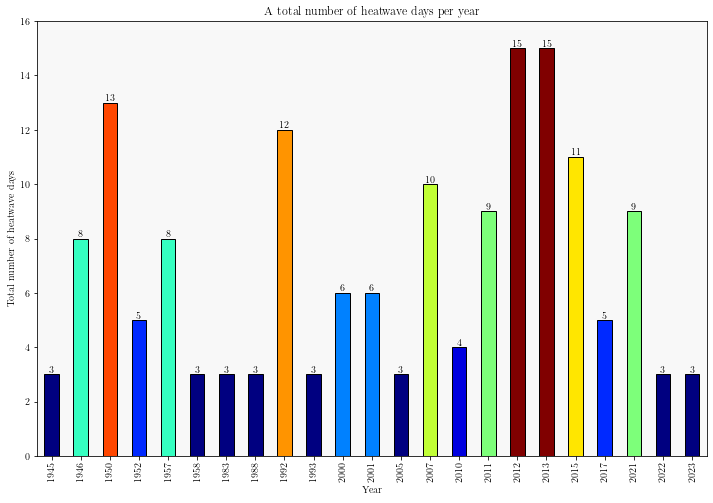

In [1308]:
# Plot a total number of heatwave days per year
plot = num_of_heatwave_days_per_year["Num of heatwave days"].plot(kind="bar", figsize=(12,8), xlabel="Year", ylabel="Total number of heatwave days", legend=False, ylim=(0,16), color=my_cmap(rescale(num_of_heatwave_days_per_year["Num of heatwave days"])), edgecolor="black")
plt.title("A total number of heatwave days per year")
plt.bar_label(container=plot.containers[0])
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to pdf file
plt.savefig('total_num_of_heatwave_days_per_year.pdf', bbox_inches='tight')

#### Total number of heatwave days per decades

In [1309]:
# Heatwave data by decades
_40s_heatwave_days = heat_waves[(heat_waves["time"].dt.year >= 1940) & (heat_waves["time"].dt.year <= 1949)]
_50s_heatwave_days = heat_waves[(heat_waves["time"].dt.year >= 1950) & (heat_waves["time"].dt.year <= 1959)]
_60s_heatwave_days = heat_waves[(heat_waves["time"].dt.year >= 1960) & (heat_waves["time"].dt.year <= 1969)]
_70s_heatwave_days = heat_waves[(heat_waves["time"].dt.year >= 1970) & (heat_waves["time"].dt.year <= 1979)]
_80s_heatwave_days = heat_waves[(heat_waves["time"].dt.year >= 1980) & (heat_waves["time"].dt.year <= 1989)]
_90s_heatwave_days = heat_waves[(heat_waves["time"].dt.year >= 1990) & (heat_waves["time"].dt.year <= 1999)]
_00s_heatwave_days = heat_waves[(heat_waves["time"].dt.year >= 2000) & (heat_waves["time"].dt.year <= 2009)]
_10s_heatwave_days = heat_waves[(heat_waves["time"].dt.year >= 2010) & (heat_waves["time"].dt.year <= 2019)]
_20s_heatwave_days = heat_waves[(heat_waves["time"].dt.year >= 2020) & (heat_waves["time"].dt.year <= 2029)]


In [1310]:
# Store total number of heatwave days per decades in dictionary
total_num_of_heatwave_days_per_decade = {
    "1940-1949": _40s_heatwave_days["time"].size,
    "1950-1959": _50s_heatwave_days["time"].size,
    "1960-1969": _60s_heatwave_days["time"].size,
    "1970-1979": _70s_heatwave_days["time"].size,
    "1980-1989": _80s_heatwave_days["time"].size,
    "1990-1999": _90s_heatwave_days["time"].size,
    "2000-2009": _00s_heatwave_days["time"].size,
    "2010-2019": _10s_heatwave_days["time"].size,
    "2020-2029": _20s_heatwave_days["time"].size
}

# Convert dictionary to dataframe
total_num_of_heatwave_days_per_decade = pd.DataFrame.from_dict([total_num_of_heatwave_days_per_decade]).transpose().rename(columns={0: "Total number of heatwave days"})
total_num_of_heatwave_days_per_decade

,Total number of heatwave days
1940-1949,11
1950-1959,29
1960-1969,0
1970-1979,0
1980-1989,6
1990-1999,15
2000-2009,25
2010-2019,59
2020-2029,15


#### Plot a total number of heatwave days per decade

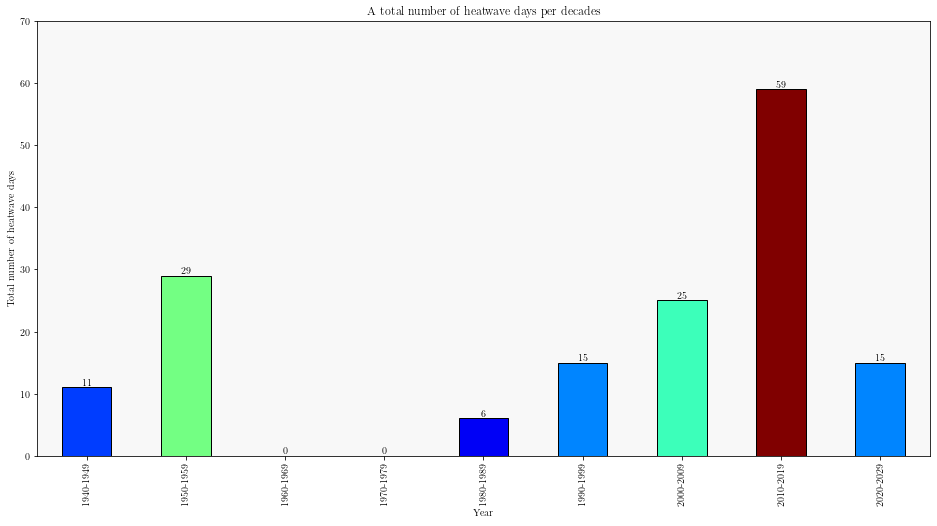

In [1311]:
# Plot a total number of heatwave days per decade
plot = total_num_of_heatwave_days_per_decade["Total number of heatwave days"].plot(kind="bar", figsize=(16,8), xlabel="Year", ylabel="Total number of heatwave days", legend=False, ylim=(0,70), color=my_cmap(rescale(total_num_of_heatwave_days_per_decade["Total number of heatwave days"])), edgecolor="black")
plt.title("A total number of heatwave days per decades")
plt.bar_label(container=plot.containers[0])
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to pdf file
plt.savefig('total_num_of_heatwave_days_per_decades.pdf', bbox_inches='tight')

#### Total number of heatwaves per year

In [1312]:
# Determine total number of heatwaves per year
total_num_of_heatwaves_per_year = heat_waves.groupby(heat_waves.time.dt.year)["grp_date"].unique().apply(lambda x: len(x))
# Print series
total_num_of_heatwaves_per_year

time
1945    1
1946    2
1950    2
1952    1
1957    2
1958    1
1983    1
1988    1
1992    3
1993    1
2000    1
2001    2
2005    1
2007    1
2010    1
2011    2
2012    3
2013    3
2015    3
2017    1
2021    2
2022    1
2023    1
Name: grp_date, dtype: int64

#### Plot total number of heatwaves per year

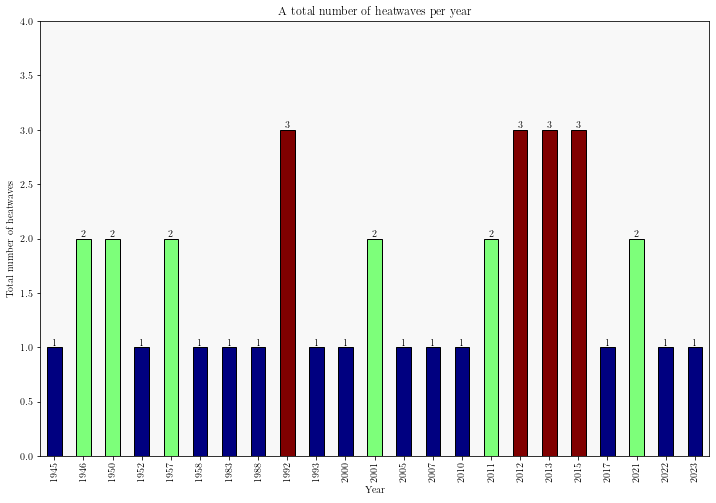

In [1313]:
# Plot a total number of heatwaves per year
plot = total_num_of_heatwaves_per_year.plot(kind="bar", figsize=(12,8), xlabel="Year", ylabel="Total number of heatwaves", legend=False, ylim=(0,4), color=my_cmap(rescale(total_num_of_heatwaves_per_year)), edgecolor="black")
plt.title("A total number of heatwaves per year")
plt.bar_label(container=plot.containers[0])
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to pdf file
plt.savefig('total_num_of_heatwaves_per_year.pdf', bbox_inches='tight')

#### Total number of heatwaves per decades

In [1314]:
# Create dataframes with the total number of heatwaves per each decade
_40s_num_of_heatwaves = {key:value for (key, value) in total_num_of_heatwaves_per_year.to_dict().items() if key >= 1940 and key <= 1949}
_50s_num_of_heatwaves = {key:value for (key, value) in total_num_of_heatwaves_per_year.to_dict().items() if key >= 1950 and key <= 1959}
_60s_num_of_heatwaves = {key:value for (key, value) in total_num_of_heatwaves_per_year.to_dict().items() if key >= 1960 and key <= 1969}
_70s_num_of_heatwaves = {key:value for (key, value) in total_num_of_heatwaves_per_year.to_dict().items() if key >= 1970 and key <= 1979}
_80s_num_of_heatwaves = {key:value for (key, value) in total_num_of_heatwaves_per_year.to_dict().items() if key >= 1980 and key <= 1989}
_90s_num_of_heatwaves = {key:value for (key, value) in total_num_of_heatwaves_per_year.to_dict().items() if key >= 1990 and key <= 1999}
_00s_num_of_heatwaves = {key:value for (key, value) in total_num_of_heatwaves_per_year.to_dict().items() if key >= 2000 and key <= 2009}
_10s_num_of_heatwaves = {key:value for (key, value) in total_num_of_heatwaves_per_year.to_dict().items() if key >= 2010 and key <= 2019}
_20s_num_of_heatwaves = {key:value for (key, value) in total_num_of_heatwaves_per_year.to_dict().items() if key >= 2020 and key <= 2029}

In [1315]:
# Store total number of heatwaves per decades in dictionary
total_num_of_heatwaves_per_decade = {
    "1940-1949": len(_40s_num_of_heatwaves.items()),
    "1950-1959": len(_50s_num_of_heatwaves.items()),
    "1960-1969": len(_60s_num_of_heatwaves.items()),
    "1970-1979": len(_70s_num_of_heatwaves.items()),
    "1980-1989": len(_80s_num_of_heatwaves.items()),
    "1990-1999": len(_90s_num_of_heatwaves.items()),
    "2000-2009": len(_00s_num_of_heatwaves.items()),
    "2010-2019": len(_10s_num_of_heatwaves.items()),
    "2020-2029": len(_20s_num_of_heatwaves.items())
}

# Convert dictionary to dataframe
total_num_of_heatwaves_per_decade = pd.DataFrame.from_dict([total_num_of_heatwaves_per_decade]).transpose().rename(columns={0: "Total number of heatwaves"})
total_num_of_heatwaves_per_decade

,Total number of heatwaves
1940-1949,2
1950-1959,4
1960-1969,0
1970-1979,0
1980-1989,2
1990-1999,2
2000-2009,4
2010-2019,6
2020-2029,3


#### Plot a total number of heatwaves per each decade

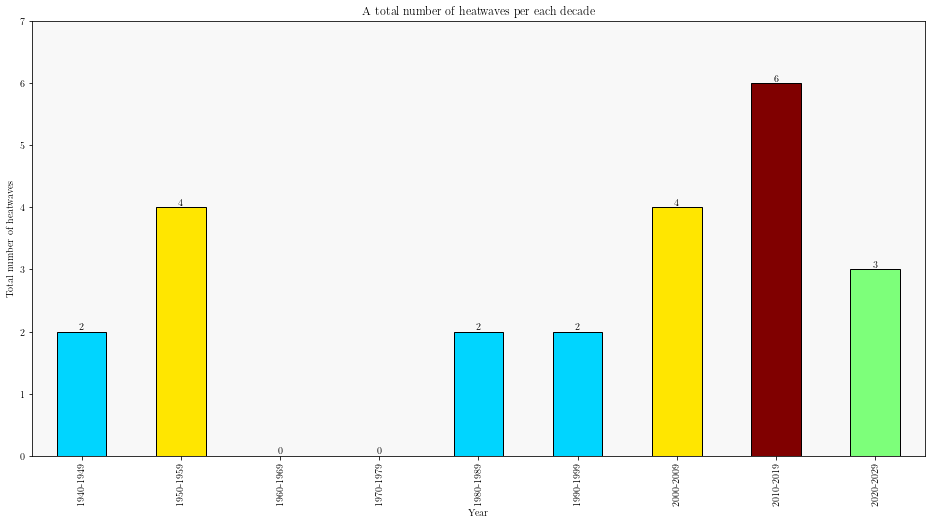

In [1316]:
# Plot a total number of heatwaves per decades
plot = total_num_of_heatwaves_per_decade["Total number of heatwaves"].plot(kind="bar", figsize=(16,8), xlabel="Year", ylabel="Total number of heatwaves", legend=False, ylim=(0,7), color=my_cmap(rescale(total_num_of_heatwaves_per_decade["Total number of heatwaves"])), edgecolor="black")
plt.title("A total number of heatwaves per each decade")
plt.bar_label(container=plot.containers[0])
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to pdf file
plt.savefig('total_num_of_heatwaves_per_decades.pdf', bbox_inches='tight')

## Cold days in Zagreb

#### Get all days with max daily temperature lower than freezing temperature

In [1317]:
# Define threshold cold temperature value
cold_threshold_temp_value = 0

# Filter out days with temperature values lower than freezing temperature
cold_days = data[data["temperature_2m_max (°C)"] < cold_threshold_temp_value].reset_index(drop=True)
# Print dataframe
cold_days

,time,weathercode (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
0,1940-01-02,3.0,-5.2,-11.8,-8.4,-9.6,-16.3,-12.9,1940-01-02T08:37,1940-01-02T17:22,0.0,0.0,0.00,0.0,8.4,20.5,51.0,6.56,0.53
1,1940-01-03,2.0,-4.7,-17.2,-11.5,-9.5,-22.0,-16.2,1940-01-03T08:37,1940-01-03T17:23,0.0,0.0,0.00,0.0,9.7,25.2,225.0,6.15,0.46
2,1940-01-04,71.0,-2.9,-10.7,-6.8,-6.5,-14.9,-10.8,1940-01-04T08:37,1940-01-04T17:24,0.6,0.0,0.42,6.0,7.3,16.6,347.0,2.92,0.28
3,1940-01-07,0.0,-0.3,-3.7,-1.6,-3.7,-7.8,-5.1,1940-01-07T08:36,1940-01-07T17:27,0.0,0.0,0.00,0.0,6.8,12.2,40.0,6.71,0.57
4,1940-01-08,1.0,-1.3,-3.8,-2.6,-4.7,-8.0,-6.4,1940-01-08T08:36,1940-01-08T17:28,0.0,0.0,0.00,0.0,7.5,14.8,28.0,6.56,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,2018-03-02,71.0,-1.1,-6.5,-4.4,-4.1,-10.5,-7.9,2018-03-02T07:32,2018-03-02T18:43,3.2,1.8,1.26,13.0,7.6,27.0,34.0,7.04,0.63
1347,2018-11-30,3.0,-0.7,-4.8,-2.3,-4.6,-9.2,-6.2,2018-11-30T08:15,2018-11-30T17:13,0.0,0.0,0.00,0.0,8.7,20.5,78.0,4.12,0.49
1348,2019-01-23,73.0,-0.7,-3.0,-1.9,-4.4,-6.6,-5.6,2019-01-23T08:27,2019-01-23T17:47,2.9,0.0,2.10,9.0,11.8,22.7,57.0,4.04,0.39
1349,2021-02-12,3.0,-0.5,-6.1,-3.4,-5.7,-10.4,-8.1,2021-02-12T08:02,2021-02-12T18:18,0.0,0.0,0.00,0.0,11.7,30.6,59.0,10.86,1.21


#### Get a total number of cold days per each year

In [1318]:
# Get a total number of cold days per each year
total_num_of_cold_days_per_year = cold_days.groupby(cold_days["time"].dt.year)["time"].count()
# Print the total number of cold days per each year
total_num_of_cold_days_per_year

time
1940    68
1941    31
1942    48
1943    13
1944    14
        ..
2016     5
2017    18
2018     7
2019     1
2021     2
Name: time, Length: 79, dtype: int64

#### Plot a total number of cold days for each year

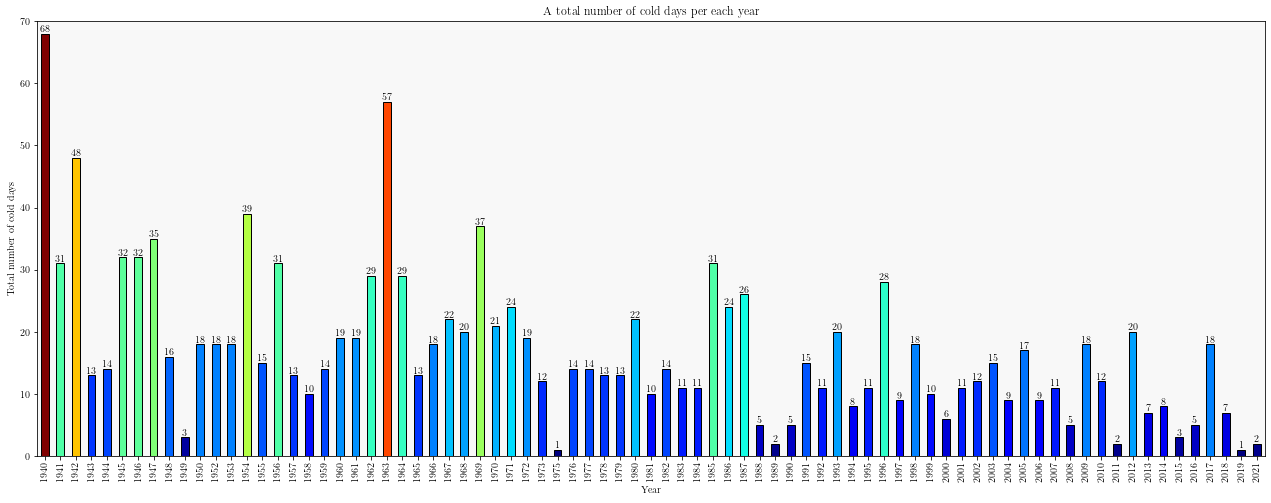

In [1319]:
# Plot a total number of cold days per each year
plot = total_num_of_cold_days_per_year.plot(kind="bar", figsize=(22,8), xlabel="Year", ylabel="Total number of cold days", legend=False, ylim=(0,70), color=my_cmap(rescale(total_num_of_cold_days_per_year)), edgecolor="black")
plt.title("A total number of cold days per each year")
plt.bar_label(container=plot.containers[0])
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to pdf file
plt.savefig('total_num_of_cold_days_per_each_year.pdf', bbox_inches='tight')

#### Get a total number of years with at least one cold day

In [1320]:
# Get a total number of years with at least one cold day
total_num_of_years_with_at_least_one_cold_day = total_num_of_cold_days_per_year.size
# Print out the value
print("A total number of years with at least one cold day:", total_num_of_years_with_at_least_one_cold_day)

A total number of years with at least one cold day: 79


#### Get a total number of years without any cold day

In [1321]:
# Get a total number of years without any cold day
total_num_of_years_without_any_cold_day = len(data["time"].dt.year.unique()) - total_num_of_years_with_at_least_one_cold_day
# Print out the value
print("A total number of years without any cold day:", total_num_of_years_without_any_cold_day)

A total number of years without any cold day: 5


#### Years without any cold day

In [1322]:
# Filter out years without any cold day
years_without_any_cold_day = []
for year in data["time"].dt.year.unique():
    if year not in cold_days["time"].dt.year.unique():
        years_without_any_cold_day.append(year)

# Print years       
print("Years without any cold day:", years_without_any_cold_day)

Years without any cold day: [1951, 1974, 2020, 2022, 2023]


#### Total number of cold days per each decade

In [1323]:
# Store a total number of cold days in each decade into dictionary
total_num_of_cold_days_per_decade = {
    "1940-1949": _40s[_40s["temperature_2m_max (°C)"] < 0]["temperature_2m_max (°C)"].count(),
    "1950-1959": _50s[_50s["temperature_2m_max (°C)"] < 0]["temperature_2m_max (°C)"].count(),
    "1960-1969": _60s[_60s["temperature_2m_max (°C)"] < 0]["temperature_2m_max (°C)"].count(),
    "1970-1979": _70s[_70s["temperature_2m_max (°C)"] < 0]["temperature_2m_max (°C)"].count(),
    "1980-1989": _80s[_80s["temperature_2m_max (°C)"] < 0]["temperature_2m_max (°C)"].count(),
    "1990-1999": _90s[_90s["temperature_2m_max (°C)"] < 0]["temperature_2m_max (°C)"].count(),
    "2000-2009": _00s[_00s["temperature_2m_max (°C)"] < 0]["temperature_2m_max (°C)"].count(),
    "2010-2019": _10s[_10s["temperature_2m_max (°C)"] < 0]["temperature_2m_max (°C)"].count(),
    "2020-2029": _20s[_20s["temperature_2m_max (°C)"] < 0]["temperature_2m_max (°C)"].count()
}

# Convert dictionary to dataframe
total_num_of_cold_days_per_decade = pd.DataFrame.from_dict([total_num_of_cold_days_per_decade]).transpose().rename(columns={0: "Total number of cold days"})
total_num_of_cold_days_per_decade

,Total number of cold days
1940-1949,292
1950-1959,176
1960-1969,263
1970-1979,131
1980-1989,156
1990-1999,135
2000-2009,113
2010-2019,83
2020-2029,2


#### Plot a total number of cold days per decades

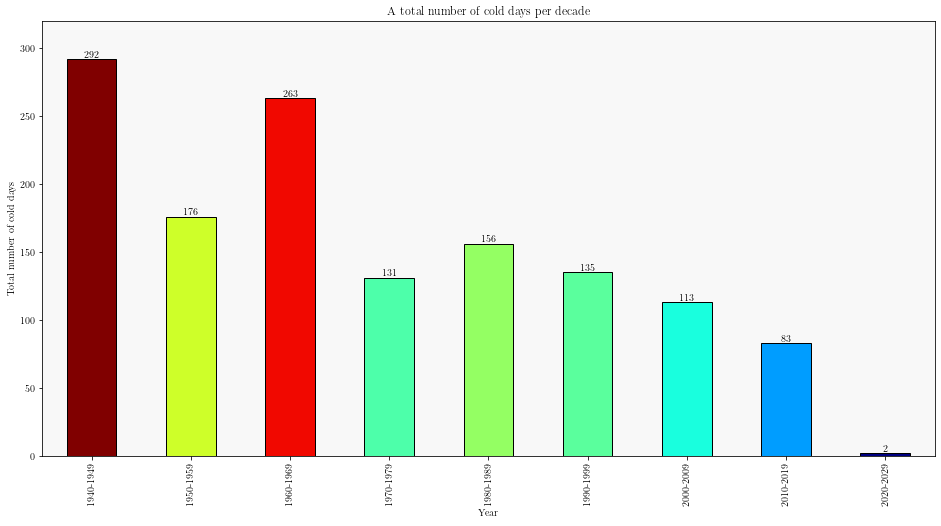

In [1324]:
# Plot a total number of cold days per decade
plot = total_num_of_cold_days_per_decade["Total number of cold days"].plot(kind="bar", figsize=(16,8), xlabel="Year", ylabel="Total number of cold days", legend=False, ylim=(0,320), color=my_cmap(rescale(total_num_of_cold_days_per_decade["Total number of cold days"])), edgecolor="black")
plt.title("A total number of cold days per decade")
plt.bar_label(container=plot.containers[0])
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to pdf file
plt.savefig('total_num_of_cold_days_per_decades.pdf', bbox_inches='tight')

## Coldwaves in Zagreb

#### Create coldwaves dataframe that stores only coldwave data (three or more consecutive days with max temperatures below freezing threshold value)

In [1325]:
# Every time we see a date with a difference greater than a day, we add a value to that date. 
# Otherwise it remains with the previous value so that we end up with a unique identifier per group.
cold_days['grp_date'] = cold_days["time"].diff().dt.days.ne(1).cumsum()

In [1326]:
# Calculate the total number of consecutive cold days by counting the equal grp_date values
num_of_consecutive_cold_days = cold_days.groupby('grp_date')['grp_date'].count()

In [1327]:
# Join dataframes on grp_date column values
df = cold_days.join(num_of_consecutive_cold_days, on="grp_date", lsuffix="", rsuffix="_total_number")
# Consider only that days with number larger than 3, i.e. we shall assume that heatwaves occur when 3 
# or more days are below given freezing threshold value.
cold_waves = df[df["grp_date_total_number"] >= 3].reset_index(drop=True)
# Print heatwaves dataframe
cold_waves

,time,weathercode (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),...,rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm),grp_date,grp_date_total_number
0,1940-01-02,3.0,-5.2,-11.8,-8.4,-9.6,-16.3,-12.9,1940-01-02T08:37,1940-01-02T17:22,...,0.0,0.00,0.0,8.4,20.5,51.0,6.56,0.53,1,3
1,1940-01-03,2.0,-4.7,-17.2,-11.5,-9.5,-22.0,-16.2,1940-01-03T08:37,1940-01-03T17:23,...,0.0,0.00,0.0,9.7,25.2,225.0,6.15,0.46,1,3
2,1940-01-04,71.0,-2.9,-10.7,-6.8,-6.5,-14.9,-10.8,1940-01-04T08:37,1940-01-04T17:24,...,0.0,0.42,6.0,7.3,16.6,347.0,2.92,0.28,1,3
3,1940-01-07,0.0,-0.3,-3.7,-1.6,-3.7,-7.8,-5.1,1940-01-07T08:36,1940-01-07T17:27,...,0.0,0.00,0.0,6.8,12.2,40.0,6.71,0.57,2,19
4,1940-01-08,1.0,-1.3,-3.8,-2.6,-4.7,-8.0,-6.4,1940-01-08T08:36,1940-01-08T17:28,...,0.0,0.00,0.0,7.5,14.8,28.0,6.56,0.53,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,2018-02-26,73.0,-5.8,-10.6,-8.0,-12.3,-17.0,-14.5,2018-02-26T07:39,2018-02-26T18:37,...,0.0,2.94,14.0,25.9,58.0,27.0,6.81,0.65,348,6
1097,2018-02-27,73.0,-5.8,-9.8,-7.8,-12.0,-15.7,-14.0,2018-02-27T07:38,2018-02-27T18:39,...,0.0,3.08,16.0,25.2,53.6,22.0,8.63,0.72,348,6
1098,2018-02-28,3.0,-5.0,-15.9,-10.1,-8.9,-20.7,-14.6,2018-02-28T07:36,2018-02-28T18:40,...,0.0,0.00,0.0,10.1,23.0,24.0,12.91,0.81,348,6
1099,2018-03-01,73.0,-4.3,-12.3,-8.1,-8.3,-16.2,-12.1,2018-03-01T07:34,2018-03-01T18:42,...,0.0,1.47,14.0,7.4,17.3,104.0,7.87,0.56,348,6


#### Total number of coldwave days per year

Why is there only one coldwave day in 2015? <br><br>
This is because coldwave from the end of 2014 extends into 2015 and algorithm also detects it as a 2015 year coldwave!

In [1328]:
# Just to show why there is only one coldwave day in 2015!
cold_waves[(cold_waves.time.dt.year == 2014) | (cold_waves.time.dt.year == 2015) | (cold_waves.time.dt.year == 2016)]

,time,weathercode (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),...,rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm),grp_date,grp_date_total_number
1068,2014-01-25,73.0,-0.1,-7.9,-2.1,-4.5,-12.3,-6.5,2014-01-25T08:25,2014-01-25T17:51,...,0.0,0.98,5.0,17.0,45.7,40.0,7.71,0.69,338,5
1069,2014-01-26,71.0,-3.3,-11.3,-7.3,-6.9,-15.6,-11.3,2014-01-26T08:24,2014-01-26T17:52,...,0.0,0.28,2.0,8.7,13.7,86.0,6.72,0.47,338,5
1070,2014-01-27,3.0,-1.4,-13.3,-7.6,-5.0,-17.7,-11.4,2014-01-27T08:23,2014-01-27T17:53,...,0.0,0.00,0.0,7.9,14.4,50.0,6.55,0.49,338,5
1071,2014-01-28,73.0,-1.3,-9.8,-5.7,-5.1,-14.0,-9.5,2014-01-28T08:22,2014-01-28T17:55,...,0.0,1.33,8.0,7.6,15.5,34.0,4.75,0.39,338,5
1072,2014-01-29,73.0,-0.7,-6.8,-3.5,-3.7,-11.0,-7.0,2014-01-29T08:21,2014-01-29T17:56,...,0.0,1.82,12.0,8.1,15.5,68.0,4.50,0.42,338,5
1073,2014-12-29,71.0,-1.4,-8.0,-5.0,-5.1,-12.3,-10.0,2014-12-29T08:37,2014-12-29T17:19,...,0.0,0.21,0.0,24.0,58.0,9.0,6.27,0.74,339,4
1074,2014-12-30,71.0,-2.8,-13.6,-9.1,-7.8,-18.7,-13.9,2014-12-30T08:37,2014-12-30T17:19,...,0.0,0.28,1.0,15.5,36.4,11.0,6.09,0.42,339,4
1075,2014-12-31,2.0,-6.4,-18.3,-12.2,-11.6,-23.4,-16.9,2014-12-31T08:37,2014-12-31T17:20,...,0.0,0.00,0.0,12.7,28.8,30.0,6.48,0.34,339,4
1076,2015-01-01,3.0,-4.3,-19.2,-11.3,-8.2,-24.0,-15.5,2015-01-01T08:37,2015-01-01T17:21,...,0.0,0.00,0.0,6.3,14.4,271.0,1.70,0.19,339,4
1077,2016-01-03,73.0,-2.3,-8.5,-4.2,-6.6,-12.8,-8.8,2016-01-03T08:37,2016-01-03T17:23,...,0.0,6.23,15.0,16.7,36.7,43.0,2.14,0.25,342,3


In [1329]:
# Calculate total number of coldwave days per each year
num_of_coldwave_days_per_year = cold_waves.groupby(cold_waves["time"].dt.year)["grp_date"].count().to_frame(name="Num of coldwave days")
# Print dataframe
num_of_coldwave_days_per_year["Num of coldwave days"]

time
1940    64
1941    24
1942    48
1943     9
1944    12
        ..
2014     8
2015     1
2016     3
2017    15
2018     6
Name: Num of coldwave days, Length: 72, dtype: int64

In [1330]:
# Total number of years with coldwaves
number_of_years_with_coldwaves, _ = num_of_coldwave_days_per_year.shape
print("Number of years with coldwaves:", number_of_years_with_coldwaves)

Number of years with coldwaves: 72


#### Plot total number of coldwave days per year

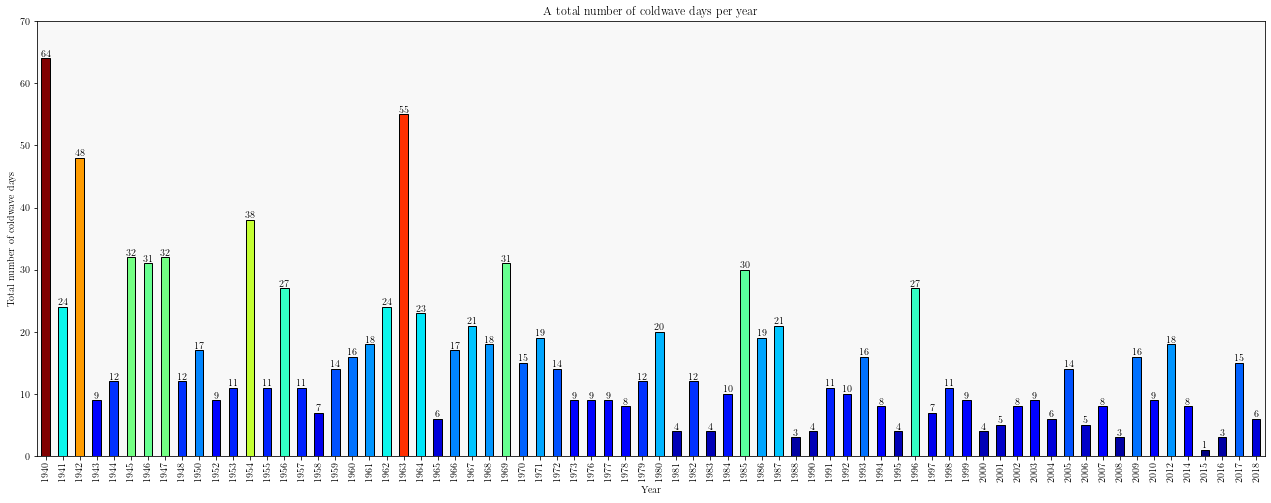

In [1331]:
# Plot a total number of coldwave days per year
plot = num_of_coldwave_days_per_year["Num of coldwave days"].plot(kind="bar", figsize=(22,8), xlabel="Year", ylabel="Total number of coldwave days", legend=False, ylim=(0,70), color=my_cmap(rescale(num_of_coldwave_days_per_year["Num of coldwave days"])), edgecolor="black")
plt.title("A total number of coldwave days per year")
plt.bar_label(container=plot.containers[0])
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to pdf file
plt.savefig('total_num_of_coldwave_days_per_year.pdf', bbox_inches='tight')

#### Total number of coldwave days per decades

In [1332]:
# Coldwave data by decades
_40s_coldwave_days = cold_waves[(cold_waves["time"].dt.year >= 1940) & (cold_waves["time"].dt.year <= 1949)]
_50s_coldwave_days = cold_waves[(cold_waves["time"].dt.year >= 1950) & (cold_waves["time"].dt.year <= 1959)]
_60s_coldwave_days = cold_waves[(cold_waves["time"].dt.year >= 1960) & (cold_waves["time"].dt.year <= 1969)]
_70s_coldwave_days = cold_waves[(cold_waves["time"].dt.year >= 1970) & (cold_waves["time"].dt.year <= 1979)]
_80s_coldwave_days = cold_waves[(cold_waves["time"].dt.year >= 1980) & (cold_waves["time"].dt.year <= 1989)]
_90s_coldwave_days = cold_waves[(cold_waves["time"].dt.year >= 1990) & (cold_waves["time"].dt.year <= 1999)]
_00s_coldwave_days = cold_waves[(cold_waves["time"].dt.year >= 2000) & (cold_waves["time"].dt.year <= 2009)]
_10s_coldwave_days = cold_waves[(cold_waves["time"].dt.year >= 2010) & (cold_waves["time"].dt.year <= 2019)]
_20s_coldwave_days = cold_waves[(cold_waves["time"].dt.year >= 2020) & (cold_waves["time"].dt.year <= 2029)]


In [1333]:
# Store total number of coldwave days per decades in dictionary
total_num_of_coldwave_days_per_decade = {
    "1940-1949": _40s_coldwave_days["time"].size,
    "1950-1959": _50s_coldwave_days["time"].size,
    "1960-1969": _60s_coldwave_days["time"].size,
    "1970-1979": _70s_coldwave_days["time"].size,
    "1980-1989": _80s_coldwave_days["time"].size,
    "1990-1999": _90s_coldwave_days["time"].size,
    "2000-2009": _00s_coldwave_days["time"].size,
    "2010-2019": _10s_coldwave_days["time"].size,
    "2020-2029": _20s_coldwave_days["time"].size
}

# Convert dictionary to dataframe
total_num_of_coldwave_days_per_decade = pd.DataFrame.from_dict([total_num_of_coldwave_days_per_decade]).transpose().rename(columns={0: "Total number of coldwave days"})
total_num_of_coldwave_days_per_decade

,Total number of coldwave days
1940-1949,264
1950-1959,145
1960-1969,229
1970-1979,95
1980-1989,123
1990-1999,107
2000-2009,78
2010-2019,60
2020-2029,0


#### Plot total number of coldwave days per decade

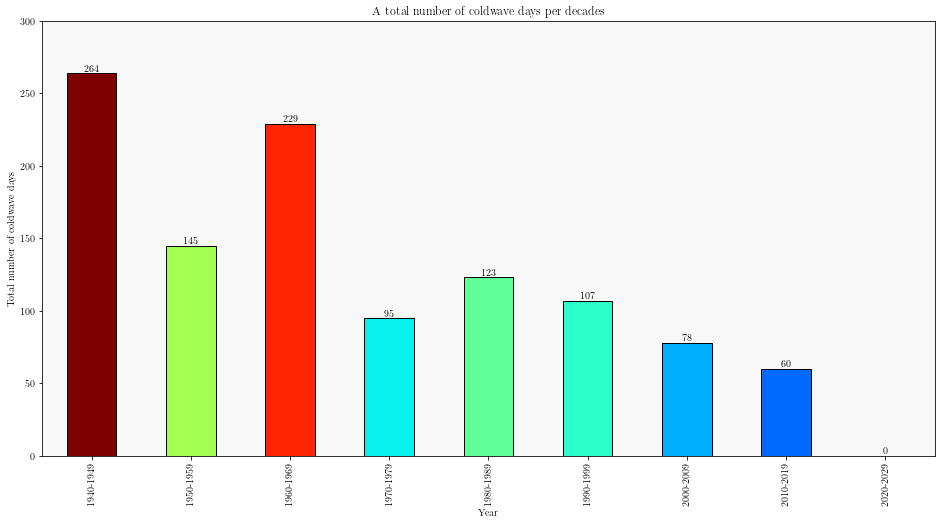

In [1334]:
# Plot a total number of coldwave days per decade
plot = total_num_of_coldwave_days_per_decade["Total number of coldwave days"].plot(kind="bar", figsize=(16,8), xlabel="Year", ylabel="Total number of coldwave days", legend=False, ylim=(0,300), color=my_cmap(rescale(total_num_of_coldwave_days_per_decade["Total number of coldwave days"])), edgecolor="black")
plt.title("A total number of coldwave days per decades")
plt.bar_label(container=plot.containers[0])
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to pdf file
plt.savefig('total_num_of_coldwave_days_per_decades.pdf', bbox_inches='tight')

#### Total number of coldwaves per year

In [1335]:
# Determine total number of coldwaves per year
total_num_of_coldwaves_per_year = cold_waves.groupby(cold_waves.time.dt.year)["grp_date"].unique().apply(lambda x: len(x))
# Print series
total_num_of_coldwaves_per_year

time
1940    6
1941    4
1942    4
1943    2
1944    3
       ..
2014    2
2015    1
2016    1
2017    2
2018    1
Name: grp_date, Length: 72, dtype: int64

#### Plot total number of coldwaves per year

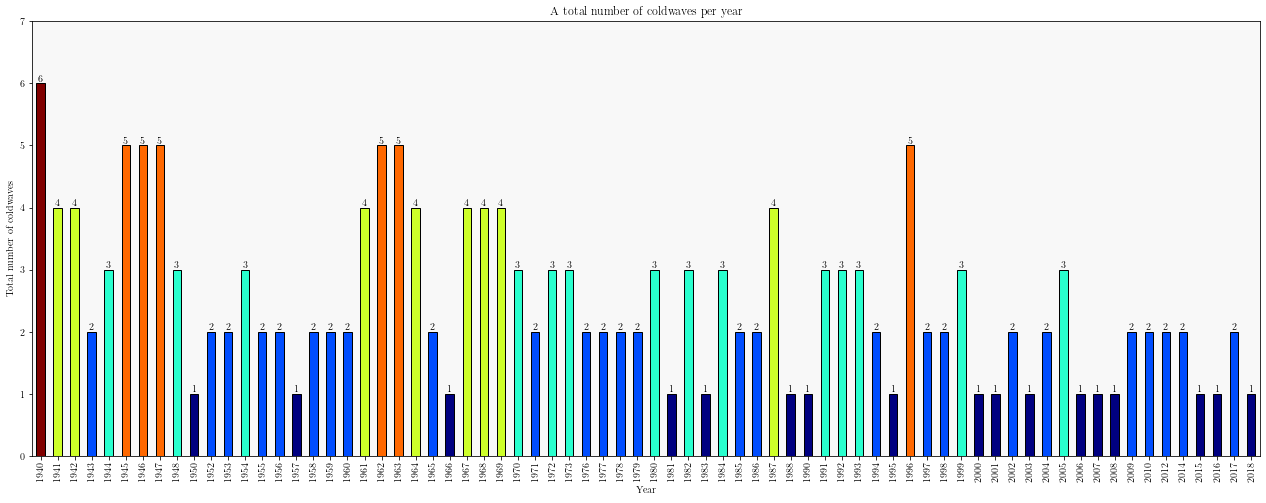

In [1336]:
# Plot a total number of coldwaves per year
plot = total_num_of_coldwaves_per_year.plot(kind="bar", figsize=(22,8), xlabel="Year", ylabel="Total number of coldwaves", legend=False, ylim=(0,7), color=my_cmap(rescale(total_num_of_coldwaves_per_year)), edgecolor="black")
plt.title("A total number of coldwaves per year")
plt.bar_label(container=plot.containers[0])
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to pdf file
plt.savefig('total_num_of_coldwaves_per_year.pdf', bbox_inches='tight')

#### Total number of coldwaves per decades

In [1337]:
# Create dataframes with the total number of coldwaves per each decade
_40s_num_of_coldwaves = {key:value for (key, value) in total_num_of_coldwaves_per_year.to_dict().items() if key >= 1940 and key <= 1949}
_50s_num_of_coldwaves = {key:value for (key, value) in total_num_of_coldwaves_per_year.to_dict().items() if key >= 1950 and key <= 1959}
_60s_num_of_coldwaves = {key:value for (key, value) in total_num_of_coldwaves_per_year.to_dict().items() if key >= 1960 and key <= 1969}
_70s_num_of_coldwaves = {key:value for (key, value) in total_num_of_coldwaves_per_year.to_dict().items() if key >= 1970 and key <= 1979}
_80s_num_of_coldwaves = {key:value for (key, value) in total_num_of_coldwaves_per_year.to_dict().items() if key >= 1980 and key <= 1989}
_90s_num_of_coldwaves = {key:value for (key, value) in total_num_of_coldwaves_per_year.to_dict().items() if key >= 1990 and key <= 1999}
_00s_num_of_coldwaves = {key:value for (key, value) in total_num_of_coldwaves_per_year.to_dict().items() if key >= 2000 and key <= 2009}
_10s_num_of_coldwaves = {key:value for (key, value) in total_num_of_coldwaves_per_year.to_dict().items() if key >= 2010 and key <= 2019}
_20s_num_of_coldwaves = {key:value for (key, value) in total_num_of_coldwaves_per_year.to_dict().items() if key >= 2020 and key <= 2029}

In [1338]:
# Store total number of coldwaves per decades in dictionary
total_num_of_coldwaves_per_decade = {
    "1940-1949": len(_40s_num_of_coldwaves.items()),
    "1950-1959": len(_50s_num_of_coldwaves.items()),
    "1960-1969": len(_60s_num_of_coldwaves.items()),
    "1970-1979": len(_70s_num_of_coldwaves.items()),
    "1980-1989": len(_80s_num_of_coldwaves.items()),
    "1990-1999": len(_90s_num_of_coldwaves.items()),
    "2000-2009": len(_00s_num_of_coldwaves.items()),
    "2010-2019": len(_10s_num_of_coldwaves.items()),
    "2020-2029": len(_20s_num_of_coldwaves.items())
}

# Convert dictionary to dataframe
total_num_of_coldwaves_per_decade = pd.DataFrame.from_dict([total_num_of_coldwaves_per_decade]).transpose().rename(columns={0: "Total number of coldwaves"})
total_num_of_coldwaves_per_decade

,Total number of coldwaves
1940-1949,9
1950-1959,9
1960-1969,10
1970-1979,8
1980-1989,9
1990-1999,10
2000-2009,10
2010-2019,7
2020-2029,0


#### Plot a total number of coldwaves per each decade

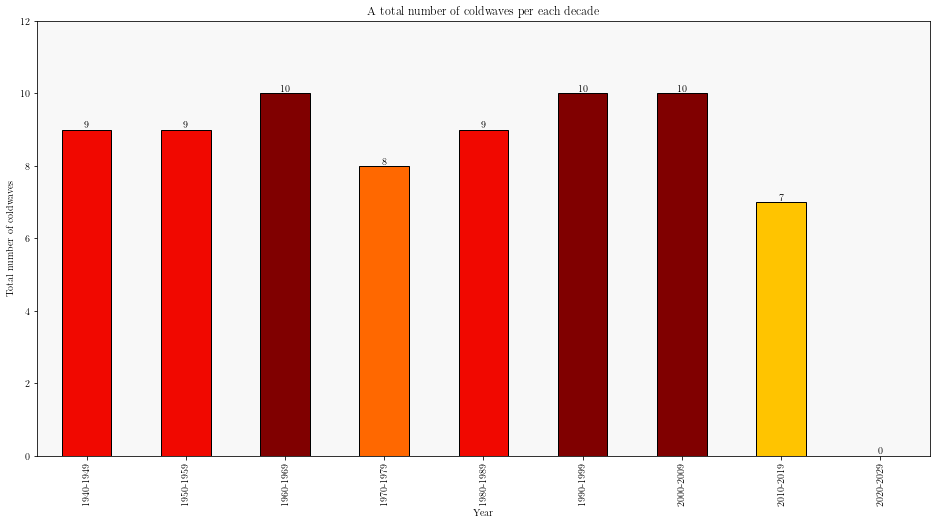

In [1339]:
# Plot a total number of coldwaves per decades
plot = total_num_of_coldwaves_per_decade["Total number of coldwaves"].plot(kind="bar", figsize=(16,8), xlabel="Year", ylabel="Total number of coldwaves", legend=False, ylim=(0,12), color=my_cmap(rescale(total_num_of_coldwaves_per_decade["Total number of coldwaves"])), edgecolor="black")
plt.title("A total number of coldwaves per each decade")
plt.bar_label(container=plot.containers[0])
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to pdf file
plt.savefig('total_num_of_coldwaves_per_decades.pdf', bbox_inches='tight')

## Temperature distribution in the summer

#### Summer data

In [1340]:
# Get only data for the summer periods
# Create empty summer data dataframe
summer_data = pd.DataFrame()
# Iterate over every unique year in data
for year in data["time"].dt.year.unique():
    summer_data = summer_data.append(data[(data["time"] >= pd.Timestamp(year=year, month=6, day=1)) & (data["time"] <= pd.Timestamp(year=year, month=8, day=31))])

# Print summer data dataframe
summer_data = summer_data.reset_index(drop=True)
summer_data

/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_60968/1630609879.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summer_data = summer_data.append(data[(data["time"] >= pd.Timestamp(year=year, month=6, day=1)) & (data["time"] <= pd.Timestamp(year=year, month=8, day=31))])
/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_60968/1630609879.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summer_data = summer_data.append(data[(data["time"] >= pd.Timestamp(year=year, month=6, day=1)) & (data["time"] <= pd.Timestamp(year=year, month=8, day=31))])
/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_60968/1630609879.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summer_data = summer_data.appen

,time,weathercode (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
0,1940-06-01,53.0,20.0,10.9,15.3,18.7,9.7,14.3,1940-06-01T05:09,1940-06-01T20:38,1.9,1.9,0.0,7.0,12.2,25.9,349.0,19.95,3.46
1,1940-06-02,51.0,16.1,12.2,13.6,13.3,9.9,11.4,1940-06-02T05:08,1940-06-02T20:39,1.1,1.1,0.0,7.0,21.7,48.6,20.0,10.14,2.10
2,1940-06-03,61.0,20.7,12.2,16.0,17.2,8.6,13.3,1940-06-03T05:08,1940-06-03T20:40,6.9,6.9,0.0,10.0,26.2,52.2,18.0,14.63,3.48
3,1940-06-04,61.0,17.1,12.4,14.6,17.7,10.0,13.2,1940-06-04T05:07,1940-06-04T20:41,27.7,27.7,0.0,24.0,18.2,40.7,11.0,3.15,1.02
4,1940-06-05,53.0,23.0,13.5,18.3,21.3,12.9,17.6,1940-06-05T05:07,1940-06-05T20:42,6.4,6.4,0.0,16.0,18.7,50.4,15.0,18.90,3.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7678,2023-07-13,63.0,29.1,19.7,23.6,34.1,20.6,26.2,2023-07-13T05:18,2023-07-13T20:44,26.3,26.3,0.0,9.0,15.5,34.9,8.0,18.45,3.73
7679,2023-07-14,2.0,27.9,16.4,22.4,29.8,18.1,24.7,2023-07-14T05:19,2023-07-14T20:44,0.0,0.0,0.0,0.0,8.3,20.5,77.0,26.88,5.19
7680,2023-07-15,0.0,32.3,20.6,26.3,35.7,22.4,29.2,2023-07-15T05:20,2023-07-15T20:43,0.0,0.0,0.0,0.0,7.0,16.9,178.0,27.58,5.75
7681,2023-07-16,0.0,33.0,19.2,27.0,36.7,21.0,30.1,2023-07-16T05:21,2023-07-16T20:42,0.0,0.0,0.0,0.0,11.2,25.2,121.0,26.20,5.83


#### Plot histogram of maximum daily temperatures for summer period (for all years)

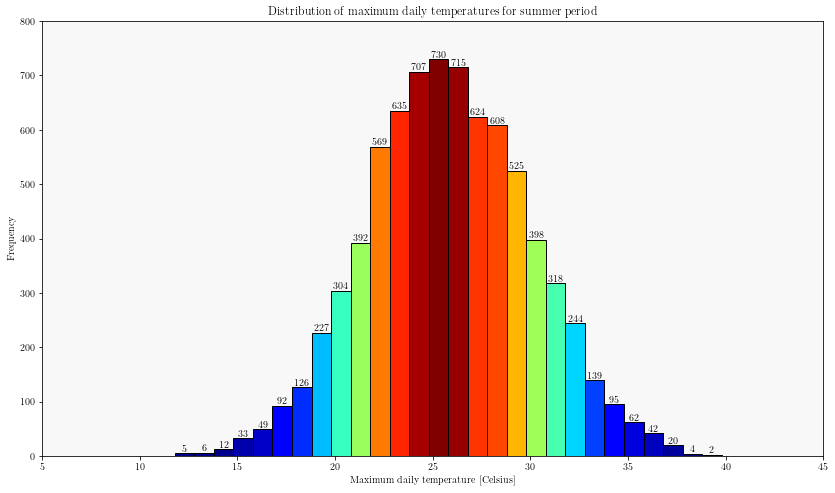

In [1341]:
# Plot histogram of maximum daily temperatures for summer period
n, bins, patches = plt.hist(x=summer_data["temperature_2m_max (°C)"], bins=np.arange(summer_data["temperature_2m_max (°C)"].min(), summer_data["temperature_2m_max (°C)"].max()+1), edgecolor="black")

# Add colormap to bins
col = (n-n.min())/(n.max()-n.min())
cm = plt.cm.get_cmap('jet')
for c, p in zip(col, patches):
   plt.setp(p, 'facecolor', cm(c))

# Get current figure and make it looks pretty
figure = plt.gcf()
figure.set_figwidth(14)
figure.set_figheight(8)
plt.xlim((5,45))
plt.ylim((0,800))
plt.xlabel("Maximum daily temperature [Celsius]")
plt.ylabel("Frequency")
plt.title("Distribution of maximum daily temperatures for summer period")
plt.bar_label(patches)
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to .pdf file
plt.savefig('distribution_of_max_daily_temperatures_for_summer_period.pdf', bbox_inches='tight')

#### Plot histogram of maximum daily temperatures for summer period (for each decade separately)

In [1342]:
# Summer period data by decades
_40s_summer_days = summer_data[(summer_data["time"].dt.year >= 1940) & (summer_data["time"].dt.year <= 1949)]
_50s_summer_days = summer_data[(summer_data["time"].dt.year >= 1950) & (summer_data["time"].dt.year <= 1959)]
_60s_summer_days = summer_data[(summer_data["time"].dt.year >= 1960) & (summer_data["time"].dt.year <= 1969)]
_70s_summer_days = summer_data[(summer_data["time"].dt.year >= 1970) & (summer_data["time"].dt.year <= 1979)]
_80s_summer_days = summer_data[(summer_data["time"].dt.year >= 1980) & (summer_data["time"].dt.year <= 1989)]
_90s_summer_days = summer_data[(summer_data["time"].dt.year >= 1990) & (summer_data["time"].dt.year <= 1999)]
_00s_summer_days = summer_data[(summer_data["time"].dt.year >= 2000) & (summer_data["time"].dt.year <= 2009)]
_10s_summer_days = summer_data[(summer_data["time"].dt.year >= 2010) & (summer_data["time"].dt.year <= 2019)]
_20s_summer_days = summer_data[(summer_data["time"].dt.year >= 2020) & (summer_data["time"].dt.year <= 2029)]

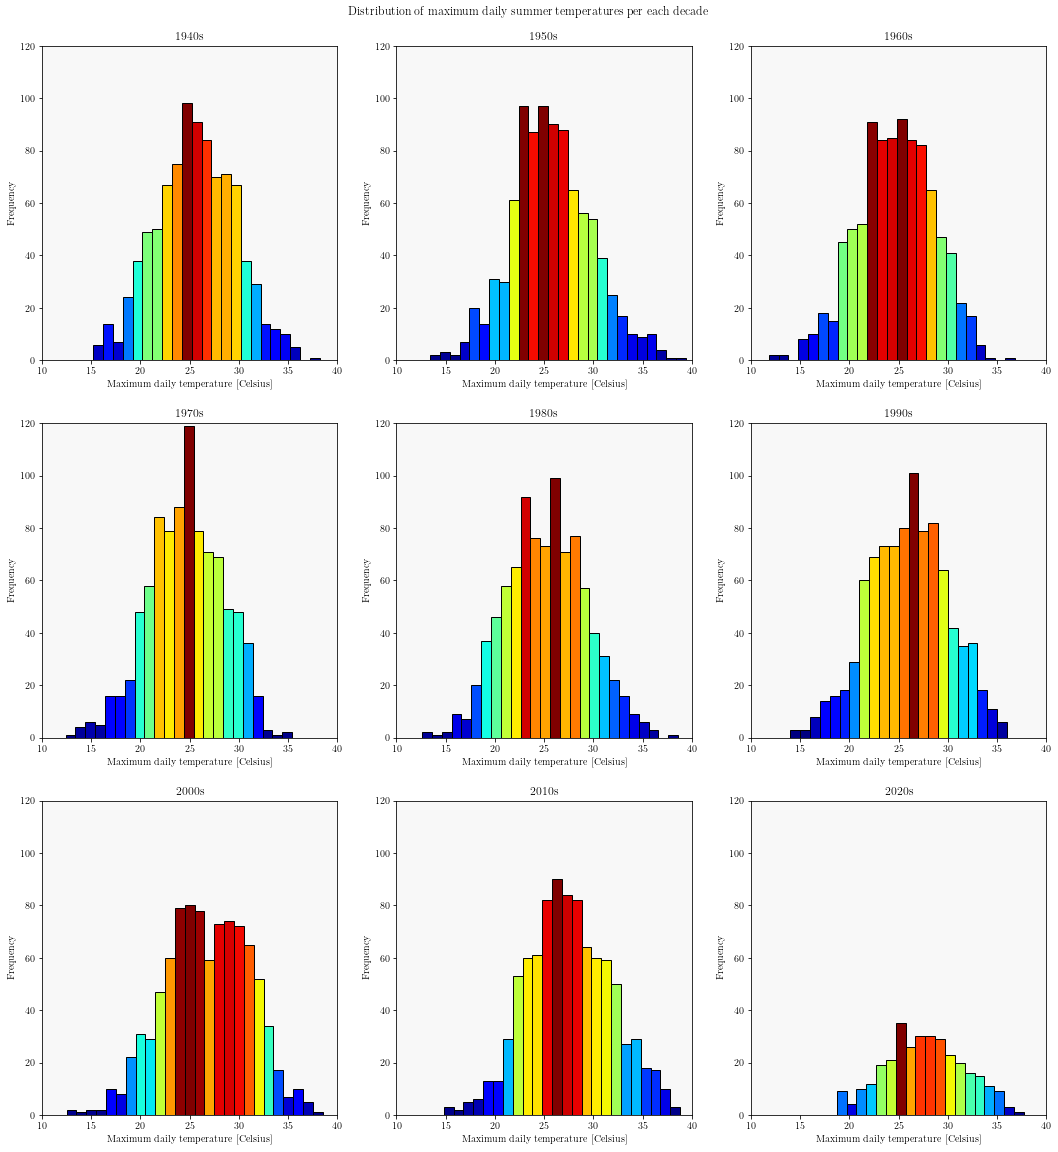

In [1343]:
# Create dictionary which will be used to iterate through
max_summer_temp_data_by_decade = {
    1: [_40s_summer_days["temperature_2m_max (°C)"], "1940s"],
    2: [_50s_summer_days["temperature_2m_max (°C)"], "1950s"],
    3: [_60s_summer_days["temperature_2m_max (°C)"], "1960s"],
    4: [_70s_summer_days["temperature_2m_max (°C)"], "1970s"],
    5: [_80s_summer_days["temperature_2m_max (°C)"], "1980s"],
    6: [_90s_summer_days["temperature_2m_max (°C)"], "1990s"],
    7: [_00s_summer_days["temperature_2m_max (°C)"], "2000s"],
    8: [_10s_summer_days["temperature_2m_max (°C)"], "2010s"],
    9: [_20s_summer_days["temperature_2m_max (°C)"], "2020s"]
}

# Iterate through dictionary key values and plot histogram subplots for every decade
for key in max_summer_temp_data_by_decade.keys():
    # Plot histogram of maximum daily temperatures for summer period by decades
    plt.subplot(3, 3, key)
    n, bins, patches = plt.hist(x=max_summer_temp_data_by_decade[key][0], bins=np.arange(max_summer_temp_data_by_decade[key][0].min(), max_summer_temp_data_by_decade[key][0].max()+1), edgecolor="black")

    # Add colormap to bins
    col = (n-n.min())/(n.max()-n.min())
    cm = plt.cm.get_cmap('jet')
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))
    
    plt.xlim((10,40))
    plt.ylim((0,120))
    plt.title(max_summer_temp_data_by_decade[key][1])
    plt.xlabel("Maximum daily temperature [Celsius]")
    plt.ylabel("Frequency")
    ax = plt.gca()
    ax.set_facecolor("#F8F8F8")

# Make figure looks pretty
figure = plt.gcf()
figure.set_figwidth(18)
figure.set_figheight(18)
plt.suptitle("Distribution of maximum daily summer temperatures per each decade")
plt.subplots_adjust(top=0.95)

# Save figure to .pdf file
plt.savefig('distribution_of_max_daily_temperatures_for_summer_period_per_each_decade.pdf', bbox_inches='tight')

#### Create boxplots for summertime maximum daily temperature data (for each decade)

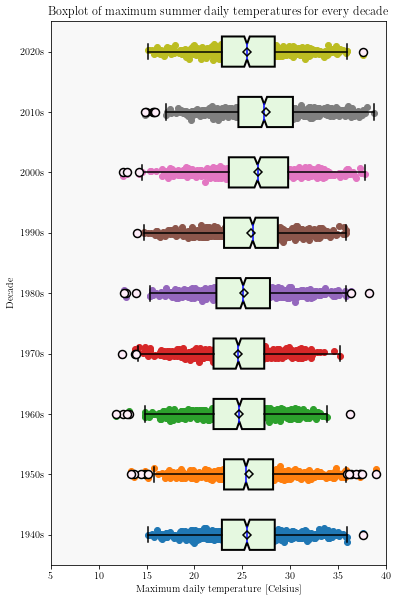

In [1344]:
# Combine summer data max daily temperature data per decade into one single dataframe
summer_data_max_daily_temps = pd.DataFrame({"1940s": _40s_summer_days["temperature_2m_max (°C)"],
                                            "1950s": _50s_summer_days["temperature_2m_max (°C)"],
                                            "1960s": _60s_summer_days["temperature_2m_max (°C)"],
                                            "1970s": _70s_summer_days["temperature_2m_max (°C)"],
                                            "1980s": _80s_summer_days["temperature_2m_max (°C)"],
                                            "1990s": _90s_summer_days["temperature_2m_max (°C)"],
                                            "2000s": _00s_summer_days["temperature_2m_max (°C)"],
                                            "2010s": _10s_summer_days["temperature_2m_max (°C)"],
                                            "2020s": _40s_summer_days["temperature_2m_max (°C)"]})

# Create boxplot
summer_data_max_daily_temps.plot.box(figsize=(6,10), boxprops=dict(linewidth=2, facecolor="#e5f8e0"), medianprops=dict(color="blue",linewidth=1.5), showmeans=True, meanline=False, meanprops=dict(linewidth=1.5, marker='D', markeredgecolor='black', markerfacecolor="none", markeredgewidth=1.5), flierprops=dict(marker='o', markersize=8, markeredgecolor='black', markeredgewidth=1.5, markerfacecolor="#FFEDF9"), notch=True, vert=False, xlim=(5,40), whiskerprops=dict(linewidth=1.5), capprops=dict(linewidth=1.5), patch_artist=True, showfliers=True)

# Make boxplot looks pretty
plt.title("Boxplot of maximum summer daily temperatures for every decade")
plt.xlabel("Maximum daily temperature [Celsius]")
plt.ylabel("Decade")
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Add scatter data to boxplot
for i, d in enumerate(summer_data_max_daily_temps):
   y = summer_data_max_daily_temps[d]
   x = np.random.normal(i + 1, 0.04, len(y))
   plt.scatter(y,x)

# Save figure to .pdf file
plt.savefig('boxplot_of_max_daily_temperatures_for_summer_period_per_each_decade.pdf', bbox_inches='tight')

#### Statistical characteristics of summertime maximum daily temperature data

In [1345]:
# Create dataframe to store data in
stat_chars_of_summer_max_temps = pd.DataFrame(columns=["decade", "mean", "Q1 - 25%", "Q2 - 50% (median)", "Q3 - 75%", "skewness", "kurtosis"])

# Iterate through dictionary and determine statistical characteristics of decade data
for key in max_summer_temp_data_by_decade:
    stat_chars_of_summer_max_temps = stat_chars_of_summer_max_temps.append({"decade": max_summer_temp_data_by_decade[key][1],
                                                                            "mean": max_summer_temp_data_by_decade[key][0].mean(),
                                                                            "Q1 - 25%": max_summer_temp_data_by_decade[key][0].quantile([0.25, 0.5, 0.75])[0.25],
                                                                            "Q2 - 50% (median)": max_summer_temp_data_by_decade[key][0].quantile([0.25, 0.5, 0.75])[0.5],
                                                                            "Q3 - 75%": max_summer_temp_data_by_decade[key][0].quantile([0.25, 0.5, 0.75])[0.75],
                                           "skewness": skew(max_summer_temp_data_by_decade[key][0], axis=0, bias=True),
                                           "kurtosis": kurtosis(max_summer_temp_data_by_decade[key][0], axis=0, bias=True)}, ignore_index=True)

# Print dataframe
stat_chars_of_summer_max_temps

/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_60968/2808098557.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_chars_of_summer_max_temps = stat_chars_of_summer_max_temps.append({"decade": max_summer_temp_data_by_decade[key][1],
/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_60968/2808098557.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_chars_of_summer_max_temps = stat_chars_of_summer_max_temps.append({"decade": max_summer_temp_data_by_decade[key][1],
/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_60968/2808098557.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_chars_of_summer_max_temps = stat_chars_of_summer_max_temps.append({"decade": max_summer_temp_data_by

,decade,mean,Q1 - 25%,Q2 - 50% (median),Q3 - 75%,skewness,kurtosis
0,1940s,25.545543,22.875,25.5,28.400,0.021424,-0.236136
1,1950s,25.677391,23.100,25.4,28.225,0.196278,0.171819
2,1960s,24.637174,22.000,24.7,27.325,-0.162374,-0.151403
3,1970s,24.566304,22.000,24.6,27.300,-0.158189,-0.155358
4,1980s,25.144783,22.300,25.1,27.900,0.059290,-0.194255
5,1990s,25.949783,23.100,26.1,28.725,-0.104344,-0.266104
6,2000s,26.635978,23.600,26.6,29.800,-0.139917,-0.291439
7,2010s,27.456304,24.600,27.3,30.300,0.059316,-0.219316
8,2020s,27.551703,24.850,27.4,30.250,0.052059,-0.531907


## Temperature distribution in the winter

#### Winter data

In [1346]:
# Get only data for the winter periods
# Create empty winter data dataframe
winter_data = pd.DataFrame()
# Iterate over every unique year in data
for year in data["time"].dt.year.unique():
    winter_data = winter_data.append(data[(data["time"] >= pd.Timestamp(year=year, month=1, day=1)) & (data["time"] < pd.Timestamp(year=year, month=3, day=1))])
    winter_data = winter_data.append(data[(data["time"] >= pd.Timestamp(year=year, month=12, day=1)) & (data["time"] <= pd.Timestamp(year=year, month=12, day=31))])

# Print winter data dataframe
winter_data = winter_data.sort_values(by="time").drop_duplicates(subset=["time"]).reset_index(drop=True)
winter_data

/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_60968/1717393023.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  winter_data = winter_data.append(data[(data["time"] >= pd.Timestamp(year=year, month=1, day=1)) & (data["time"] < pd.Timestamp(year=year, month=3, day=1))])
/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_60968/1717393023.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  winter_data = winter_data.append(data[(data["time"] >= pd.Timestamp(year=year, month=12, day=1)) & (data["time"] <= pd.Timestamp(year=year, month=12, day=31))])
/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_60968/1717393023.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  winter_data = winter_data.appen

,time,weathercode (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
0,1940-01-02,3.0,-5.2,-11.8,-8.4,-9.6,-16.3,-12.9,1940-01-02T08:37,1940-01-02T17:22,0.0,0.0,0.00,0.0,8.4,20.5,51.0,6.56,0.53
1,1940-01-03,2.0,-4.7,-17.2,-11.5,-9.5,-22.0,-16.2,1940-01-03T08:37,1940-01-03T17:23,0.0,0.0,0.00,0.0,9.7,25.2,225.0,6.15,0.46
2,1940-01-04,71.0,-2.9,-10.7,-6.8,-6.5,-14.9,-10.8,1940-01-04T08:37,1940-01-04T17:24,0.6,0.0,0.42,6.0,7.3,16.6,347.0,2.92,0.28
3,1940-01-05,3.0,-0.0,-3.7,-2.0,-4.5,-7.3,-6.0,1940-01-05T08:37,1940-01-05T17:25,0.0,0.0,0.00,0.0,8.7,21.2,14.0,4.92,0.63
4,1940-01-06,1.0,0.5,-2.6,-1.1,-3.3,-6.4,-5.0,1940-01-06T08:36,1940-01-06T17:26,0.0,0.0,0.00,0.0,8.2,15.1,15.0,5.61,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7544,2023-02-24,3.0,14.5,2.0,8.5,10.4,-1.1,5.4,2023-02-24T07:43,2023-02-24T18:34,0.0,0.0,0.00,0.0,22.7,46.4,236.0,9.10,1.57
7545,2023-02-25,73.0,12.6,2.4,8.4,11.5,-0.6,5.7,2023-02-25T07:42,2023-02-25T18:36,15.7,15.4,0.21,15.0,19.0,43.9,191.0,5.61,0.98
7546,2023-02-26,75.0,3.2,0.7,1.8,-1.1,-4.4,-2.4,2023-02-26T07:40,2023-02-26T18:37,15.9,4.6,7.91,24.0,21.0,46.4,46.0,5.51,0.77
7547,2023-02-27,71.0,3.2,-0.6,1.0,-1.6,-5.1,-3.6,2023-02-27T07:38,2023-02-27T18:38,1.8,0.6,0.84,14.0,17.9,37.4,43.0,7.89,1.09


#### Plot histogram of maximum daily temperatures for winter period (for all years)

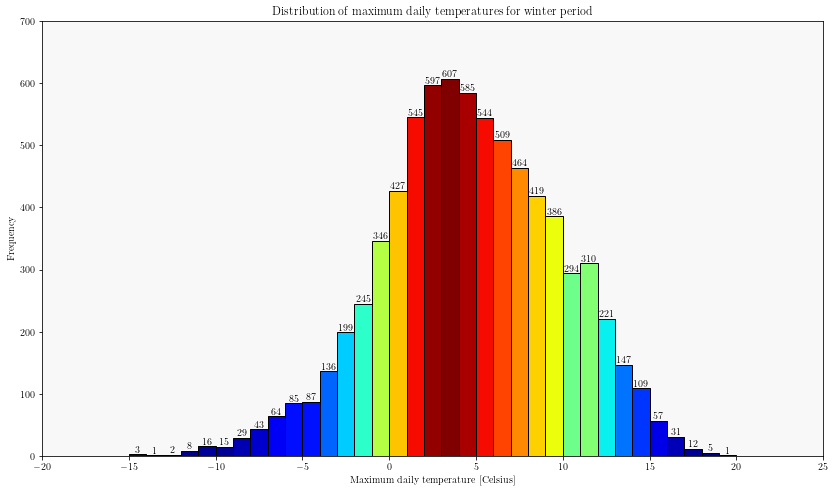

In [1347]:
# Plot histogram of maximum daily temperatures for winter period
n, bins, patches = plt.hist(x=winter_data["temperature_2m_max (°C)"], bins=np.arange(winter_data["temperature_2m_max (°C)"].min(), winter_data["temperature_2m_max (°C)"].max()+1), edgecolor="black")

# Add colormap to bins
col = (n-n.min())/(n.max()-n.min())
cm = plt.cm.get_cmap('jet')
for c, p in zip(col, patches):
   plt.setp(p, 'facecolor', cm(c))

# Get current figure and make it looks pretty
figure = plt.gcf()
figure.set_figwidth(14)
figure.set_figheight(8)
plt.xlim((-20,25))
plt.ylim((0,700))
plt.xlabel("Maximum daily temperature [Celsius]")
plt.ylabel("Frequency")
plt.title("Distribution of maximum daily temperatures for winter period")
plt.bar_label(patches)
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to .pdf file
plt.savefig('distribution_of_max_daily_temperatures_for_winter_period.pdf', bbox_inches='tight')

#### Plot histogram of maximum daily temperatures for winter period (for each decade separately)

In [1348]:
# Winter period data by decades
_40s_winter_days = winter_data[(winter_data["time"].dt.year >= 1940) & (winter_data["time"].dt.year <= 1949)]
_50s_winter_days = winter_data[(winter_data["time"].dt.year >= 1950) & (winter_data["time"].dt.year <= 1959)]
_60s_winter_days = winter_data[(winter_data["time"].dt.year >= 1960) & (winter_data["time"].dt.year <= 1969)]
_70s_winter_days = winter_data[(winter_data["time"].dt.year >= 1970) & (winter_data["time"].dt.year <= 1979)]
_80s_winter_days = winter_data[(winter_data["time"].dt.year >= 1980) & (winter_data["time"].dt.year <= 1989)]
_90s_winter_days = winter_data[(winter_data["time"].dt.year >= 1990) & (winter_data["time"].dt.year <= 1999)]
_00s_winter_days = winter_data[(winter_data["time"].dt.year >= 2000) & (winter_data["time"].dt.year <= 2009)]
_10s_winter_days = winter_data[(winter_data["time"].dt.year >= 2010) & (winter_data["time"].dt.year <= 2019)]
_20s_winter_days = winter_data[(winter_data["time"].dt.year >= 2020) & (winter_data["time"].dt.year <= 2029)]

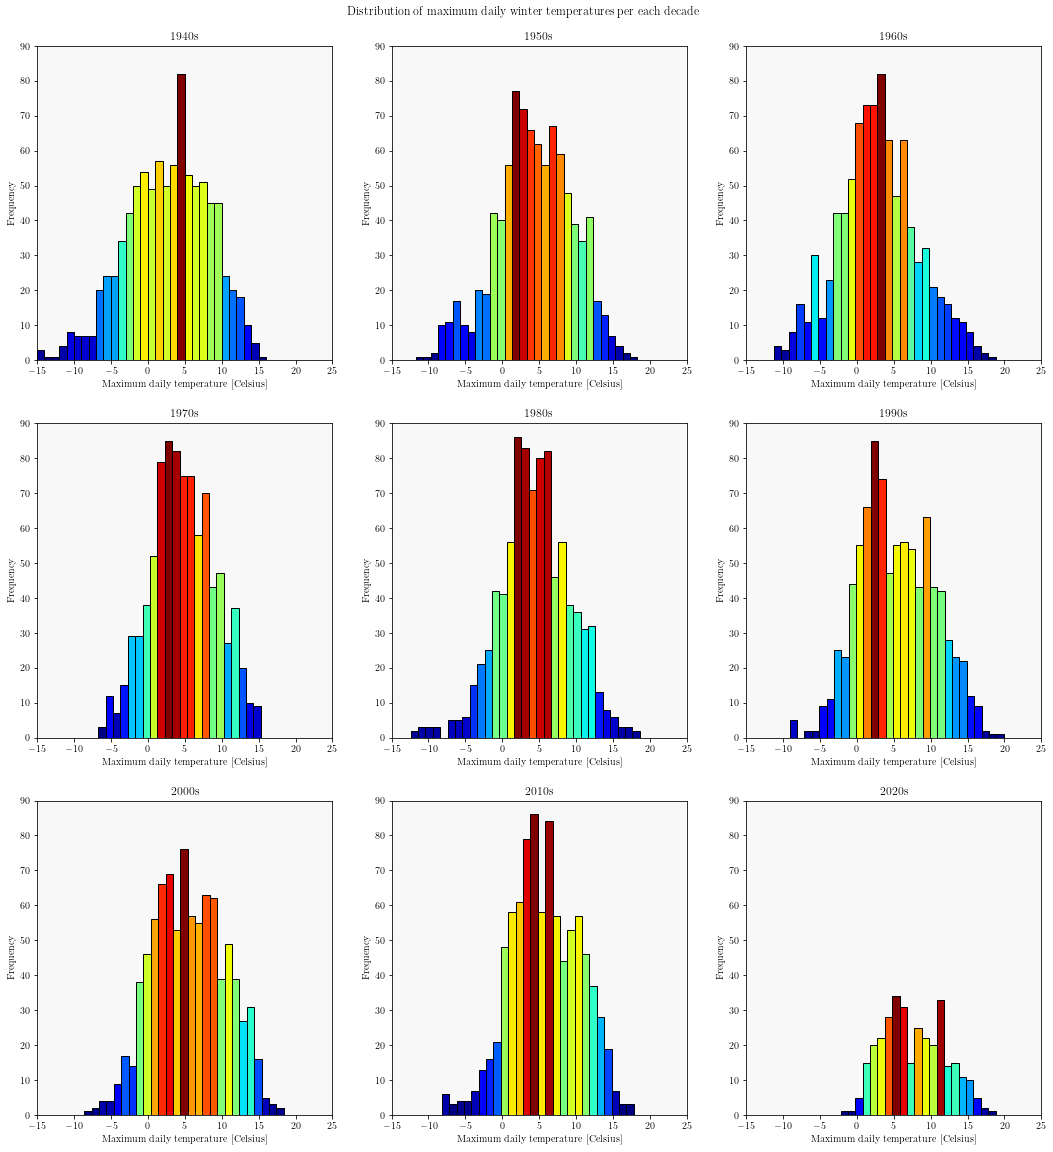

In [1349]:
# Create dictionary which will be used to iterate through
max_winter_temp_data_by_decade = {
    1: [_40s_winter_days["temperature_2m_max (°C)"], "1940s"],
    2: [_50s_winter_days["temperature_2m_max (°C)"], "1950s"],
    3: [_60s_winter_days["temperature_2m_max (°C)"], "1960s"],
    4: [_70s_winter_days["temperature_2m_max (°C)"], "1970s"],
    5: [_80s_winter_days["temperature_2m_max (°C)"], "1980s"],
    6: [_90s_winter_days["temperature_2m_max (°C)"], "1990s"],
    7: [_00s_winter_days["temperature_2m_max (°C)"], "2000s"],
    8: [_10s_winter_days["temperature_2m_max (°C)"], "2010s"],
    9: [_20s_winter_days["temperature_2m_max (°C)"], "2020s"]
}

# Iterate through dictionary key values and plot histogram subplots for every decade
for key in max_winter_temp_data_by_decade.keys():
    # Plot histogram of maximum daily temperatures for winter period by decades
    plt.subplot(3, 3, key)
    n, bins, patches = plt.hist(x=max_winter_temp_data_by_decade[key][0], bins=np.arange(max_winter_temp_data_by_decade[key][0].min(), max_winter_temp_data_by_decade[key][0].max()+1), edgecolor="black")

    # Add colormap to bins
    col = (n-n.min())/(n.max()-n.min())
    cm = plt.cm.get_cmap('jet')
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))
    
    plt.xlim((-15,25))
    plt.ylim((0,90))
    plt.title(max_winter_temp_data_by_decade[key][1])
    plt.xlabel("Maximum daily temperature [Celsius]")
    plt.ylabel("Frequency")
    ax = plt.gca()
    ax.set_facecolor("#F8F8F8")

# Make figure looks pretty
figure = plt.gcf()
figure.set_figwidth(18)
figure.set_figheight(18)
plt.suptitle("Distribution of maximum daily winter temperatures per each decade")
plt.subplots_adjust(top=0.95)

# Save figure to .pdf file
plt.savefig('distribution_of_max_daily_temperatures_for_winter_period_per_each_decade.pdf', bbox_inches='tight')

#### Create boxplots for wintertime maximum daily temperature data (for each decade)

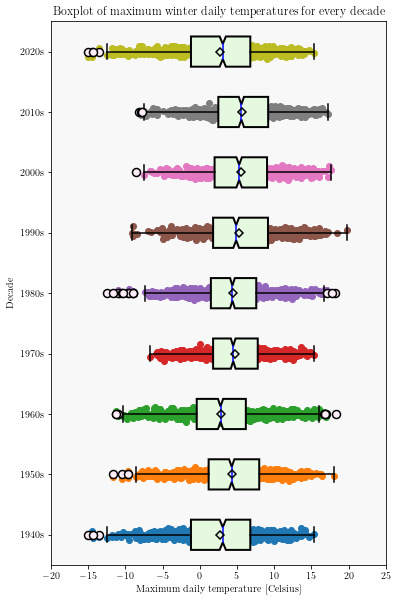

In [1350]:
# Combine winter data max daily temperature data per decade into one single dataframe
winter_data_max_daily_temps = pd.DataFrame({"1940s": _40s_winter_days["temperature_2m_max (°C)"],
                                            "1950s": _50s_winter_days["temperature_2m_max (°C)"],
                                            "1960s": _60s_winter_days["temperature_2m_max (°C)"],
                                            "1970s": _70s_winter_days["temperature_2m_max (°C)"],
                                            "1980s": _80s_winter_days["temperature_2m_max (°C)"],
                                            "1990s": _90s_winter_days["temperature_2m_max (°C)"],
                                            "2000s": _00s_winter_days["temperature_2m_max (°C)"],
                                            "2010s": _10s_winter_days["temperature_2m_max (°C)"],
                                            "2020s": _40s_winter_days["temperature_2m_max (°C)"]})

# Create boxplot
winter_data_max_daily_temps.plot.box(figsize=(6,10), boxprops=dict(linewidth=2, facecolor="#e5f8e0"), medianprops=dict(color="blue",linewidth=1.5), showmeans=True, meanline=False, meanprops=dict(linewidth=1.5, marker='D', markeredgecolor='black', markerfacecolor="none", markeredgewidth=1.5), flierprops=dict(marker='o', markersize=8, markeredgecolor='black', markeredgewidth=1.5, markerfacecolor="#FFEDF9"), notch=True, vert=False, xlim=(-20,25), whiskerprops=dict(linewidth=1.5), capprops=dict(linewidth=1.5), patch_artist=True, showfliers=True)

# Make boxplot looks pretty
plt.title("Boxplot of maximum winter daily temperatures for every decade")
plt.xlabel("Maximum daily temperature [Celsius]")
plt.ylabel("Decade")
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Add scatter data to boxplot
for i, d in enumerate(winter_data_max_daily_temps):
   y = winter_data_max_daily_temps[d]
   x = np.random.normal(i + 1, 0.04, len(y))
   plt.scatter(y,x)

# Save figure to .pdf file
plt.savefig('boxplot_of_max_daily_temperatures_for_winter_period_per_each_decade.pdf', bbox_inches='tight')

#### Statistical characteristics of wintertime maximum daily temperature data

In [1351]:
# Create dataframe to store data in
stat_chars_of_winter_max_temps = pd.DataFrame(columns=["decade", "mean", "Q1 - 25%", "Q2 - 50% (median)", "Q3 - 75%", "skewness", "kurtosis"])

# Iterate through dictionary and determine statistical characteristics of decade data
for key in max_winter_temp_data_by_decade:
    stat_chars_of_winter_max_temps = stat_chars_of_winter_max_temps.append({"decade": max_winter_temp_data_by_decade[key][1],
                                                                            "mean": max_winter_temp_data_by_decade[key][0].mean(),
                                                                            "Q1 - 25%": max_winter_temp_data_by_decade[key][0].quantile([0.25, 0.5, 0.75])[0.25],
                                                                            "Q2 - 50% (median)": max_winter_temp_data_by_decade[key][0].quantile([0.25, 0.5, 0.75])[0.5],
                                                                            "Q3 - 75%": max_winter_temp_data_by_decade[key][0].quantile([0.25, 0.5, 0.75])[0.75],
                                           "skewness": skew(max_winter_temp_data_by_decade[key][0], axis=0, bias=True),
                                           "kurtosis": kurtosis(max_winter_temp_data_by_decade[key][0], axis=0, bias=True)}, ignore_index=True)

# Print dataframe
stat_chars_of_winter_max_temps

/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_60968/1505463989.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_chars_of_winter_max_temps = stat_chars_of_winter_max_temps.append({"decade": max_winter_temp_data_by_decade[key][1],
/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_60968/1505463989.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_chars_of_winter_max_temps = stat_chars_of_winter_max_temps.append({"decade": max_winter_temp_data_by_decade[key][1],
/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_60968/1505463989.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_chars_of_winter_max_temps = stat_chars_of_winter_max_temps.append({"decade": max_winter_temp_data_by

,decade,mean,Q1 - 25%,Q2 - 50% (median),Q3 - 75%,skewness,kurtosis
0,1940s,2.675942,-1.175,3.1,6.800,-0.295439,-0.243931
1,1950s,4.327051,1.200,4.3,8.000,-0.232801,-0.145964
2,1960s,2.899003,-0.400,2.8,6.200,0.090592,-0.054014
3,1970s,4.723171,1.800,4.5,7.800,0.014337,-0.428742
4,1980s,4.407530,1.500,4.4,7.600,-0.135848,0.371254
5,1990s,5.345565,1.800,4.9,9.175,0.106410,-0.419439
6,2000s,5.581063,2.000,5.3,9.050,0.032920,-0.550008
7,2010s,5.750554,2.500,5.6,9.200,-0.109301,-0.210931
8,2020s,7.689091,4.400,7.4,11.000,0.224681,-0.764085


## Temperature distribution in the spring

#### Spring data

In [1352]:
# Get only data for the spring periods
# Create empty spring data dataframe
spring_data = pd.DataFrame()
# Iterate over every unique year in data
for year in data["time"].dt.year.unique():
    spring_data = spring_data.append(data[(data["time"] >= pd.Timestamp(year=year, month=3, day=1)) & (data["time"] < pd.Timestamp(year=year, month=6, day=1))])

# Print spring data dataframe
spring_data = spring_data.sort_values(by="time").drop_duplicates(subset=["time"]).reset_index(drop=True)
spring_data

/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_60968/2774089988.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  spring_data = spring_data.append(data[(data["time"] >= pd.Timestamp(year=year, month=3, day=1)) & (data["time"] < pd.Timestamp(year=year, month=6, day=1))])
/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_60968/2774089988.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  spring_data = spring_data.append(data[(data["time"] >= pd.Timestamp(year=year, month=3, day=1)) & (data["time"] < pd.Timestamp(year=year, month=6, day=1))])
/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_60968/2774089988.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  spring_data = spring_data.append(da

,time,weathercode (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
0,1940-03-01,71.0,6.6,-4.2,0.7,3.1,-8.2,-3.1,1940-03-01T07:33,1940-03-01T18:42,0.3,0.0,0.21,3.0,15.1,34.2,20.0,11.66,1.22
1,1940-03-02,71.0,-1.4,-7.0,-3.5,-6.7,-11.5,-8.5,1940-03-02T07:31,1940-03-02T18:44,0.2,0.0,0.14,2.0,21.3,45.4,54.0,13.19,1.21
2,1940-03-03,0.0,0.1,-8.0,-3.4,-3.7,-12.4,-7.5,1940-03-03T07:29,1940-03-03T18:45,0.0,0.0,0.00,0.0,8.9,17.3,223.0,15.11,1.35
3,1940-03-04,1.0,8.0,-7.0,0.8,3.6,-11.7,-3.4,1940-03-04T07:27,1940-03-04T18:47,0.0,0.0,0.00,0.0,13.4,24.8,243.0,14.13,1.72
4,1940-03-05,53.0,8.2,-1.0,3.2,4.9,-5.6,-0.4,1940-03-05T07:26,1940-03-05T18:48,1.1,1.1,0.00,3.0,18.7,31.7,253.0,9.23,1.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7723,2023-05-27,51.0,21.4,15.0,17.9,20.6,12.9,16.5,2023-05-27T05:13,2023-05-27T20:33,0.5,0.5,0.00,2.0,15.3,35.3,28.0,20.46,3.99
7724,2023-05-28,51.0,22.3,11.8,17.8,23.0,10.6,17.3,2023-05-28T05:12,2023-05-28T20:34,0.3,0.3,0.00,2.0,12.0,25.9,38.0,22.55,4.19
7725,2023-05-29,53.0,23.5,12.2,18.1,24.4,11.6,18.3,2023-05-29T05:11,2023-05-29T20:35,2.5,2.5,0.00,6.0,14.8,33.8,43.0,22.35,4.04
7726,2023-05-30,55.0,23.2,12.5,18.3,23.5,12.4,18.6,2023-05-30T05:10,2023-05-30T20:36,2.6,2.6,0.00,11.0,13.0,31.3,41.0,21.93,4.07


#### Plot histogram of maximum daily temperatures for spring period (for all years)

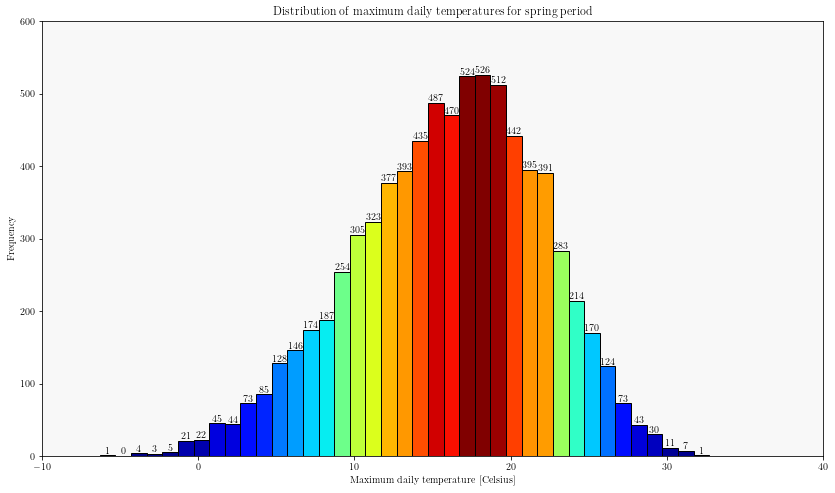

In [1353]:
# Plot histogram of maximum daily temperatures for spring period
n, bins, patches = plt.hist(x=spring_data["temperature_2m_max (°C)"], bins=np.arange(spring_data["temperature_2m_max (°C)"].min(), spring_data["temperature_2m_max (°C)"].max()+1), edgecolor="black")

# Add colormap to bins
col = (n-n.min())/(n.max()-n.min())
cm = plt.cm.get_cmap('jet')
for c, p in zip(col, patches):
   plt.setp(p, 'facecolor', cm(c))

# Get current figure and make it looks pretty
figure = plt.gcf()
figure.set_figwidth(14)
figure.set_figheight(8)
plt.xlim((-10,40))
plt.ylim((0,600))
plt.xlabel("Maximum daily temperature [Celsius]")
plt.ylabel("Frequency")
plt.title("Distribution of maximum daily temperatures for spring period")
plt.bar_label(patches)
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to .pdf file
plt.savefig('distribution_of_max_daily_temperatures_for_spring_period.pdf', bbox_inches='tight')

#### Plot histogram of maximum daily temperatures for spring period (for each decade separately)

In [1354]:
# Spring period data by decades
_40s_spring_days = spring_data[(spring_data["time"].dt.year >= 1940) & (spring_data["time"].dt.year <= 1949)]
_50s_spring_days = spring_data[(spring_data["time"].dt.year >= 1950) & (spring_data["time"].dt.year <= 1959)]
_60s_spring_days = spring_data[(spring_data["time"].dt.year >= 1960) & (spring_data["time"].dt.year <= 1969)]
_70s_spring_days = spring_data[(spring_data["time"].dt.year >= 1970) & (spring_data["time"].dt.year <= 1979)]
_80s_spring_days = spring_data[(spring_data["time"].dt.year >= 1980) & (spring_data["time"].dt.year <= 1989)]
_90s_spring_days = spring_data[(spring_data["time"].dt.year >= 1990) & (spring_data["time"].dt.year <= 1999)]
_00s_spring_days = spring_data[(spring_data["time"].dt.year >= 2000) & (spring_data["time"].dt.year <= 2009)]
_10s_spring_days = spring_data[(spring_data["time"].dt.year >= 2010) & (spring_data["time"].dt.year <= 2019)]
_20s_spring_days = spring_data[(spring_data["time"].dt.year >= 2020) & (spring_data["time"].dt.year <= 2029)]

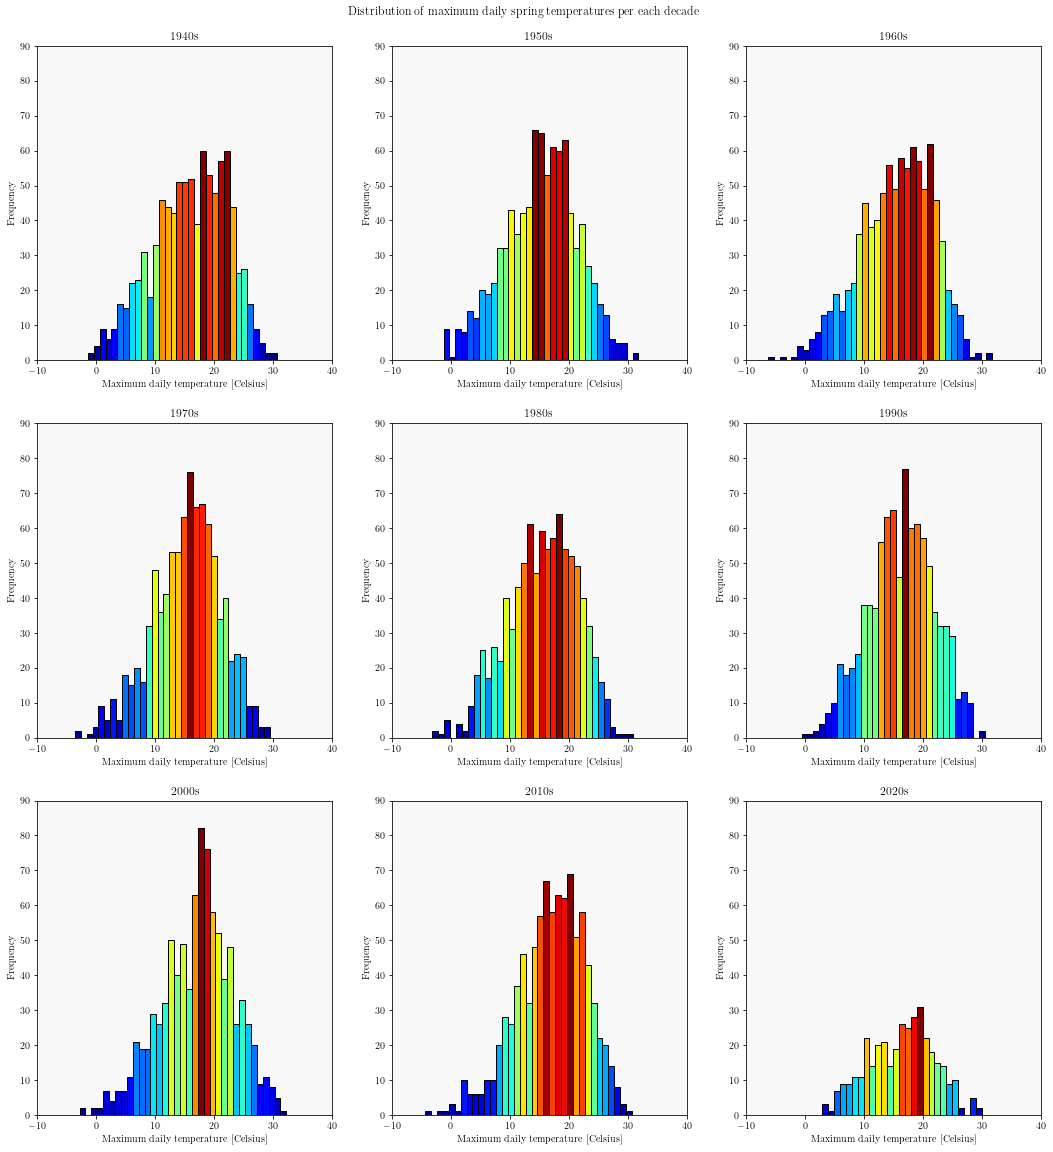

In [1355]:
# Create dictionary which will be used to iterate through
max_spring_temp_data_by_decade = {
    1: [_40s_spring_days["temperature_2m_max (°C)"], "1940s"],
    2: [_50s_spring_days["temperature_2m_max (°C)"], "1950s"],
    3: [_60s_spring_days["temperature_2m_max (°C)"], "1960s"],
    4: [_70s_spring_days["temperature_2m_max (°C)"], "1970s"],
    5: [_80s_spring_days["temperature_2m_max (°C)"], "1980s"],
    6: [_90s_spring_days["temperature_2m_max (°C)"], "1990s"],
    7: [_00s_spring_days["temperature_2m_max (°C)"], "2000s"],
    8: [_10s_spring_days["temperature_2m_max (°C)"], "2010s"],
    9: [_20s_spring_days["temperature_2m_max (°C)"], "2020s"]
}

# Iterate through dictionary key values and plot histogram subplots for every decade
for key in max_spring_temp_data_by_decade.keys():
    # Plot histogram of maximum daily temperatures for spring period by decades
    plt.subplot(3, 3, key)
    n, bins, patches = plt.hist(x=max_spring_temp_data_by_decade[key][0], bins=np.arange(max_spring_temp_data_by_decade[key][0].min(), max_spring_temp_data_by_decade[key][0].max()+1), edgecolor="black")

    # Add colormap to bins
    col = (n-n.min())/(n.max()-n.min())
    cm = plt.cm.get_cmap('jet')
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))
    
    plt.xlim((-10,40))
    plt.ylim((0,90))
    plt.title(max_spring_temp_data_by_decade[key][1])
    plt.xlabel("Maximum daily temperature [Celsius]")
    plt.ylabel("Frequency")
    ax = plt.gca()
    ax.set_facecolor("#F8F8F8")

# Make figure looks pretty
figure = plt.gcf()
figure.set_figwidth(18)
figure.set_figheight(18)
plt.suptitle("Distribution of maximum daily spring temperatures per each decade")
plt.subplots_adjust(top=0.95)

# Save figure to .pdf file
plt.savefig('distribution_of_max_daily_temperatures_for_spring_period_per_each_decade.pdf', bbox_inches='tight')

#### Create boxplots for springtime maximum daily temperature data (for each decade)

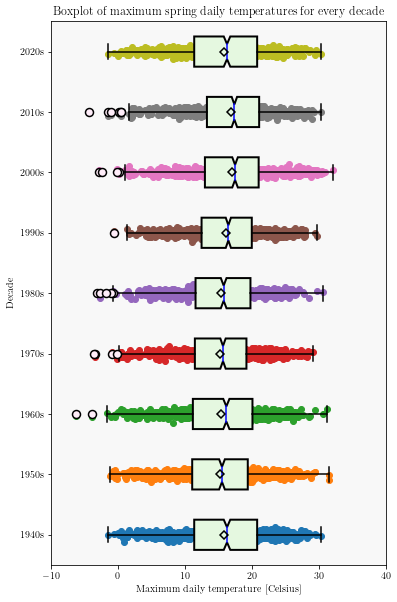

In [1356]:
# Combine spring data max daily temperature data per decade into one single dataframe
spring_data_max_daily_temps = pd.DataFrame({"1940s": _40s_spring_days["temperature_2m_max (°C)"],
                                            "1950s": _50s_spring_days["temperature_2m_max (°C)"],
                                            "1960s": _60s_spring_days["temperature_2m_max (°C)"],
                                            "1970s": _70s_spring_days["temperature_2m_max (°C)"],
                                            "1980s": _80s_spring_days["temperature_2m_max (°C)"],
                                            "1990s": _90s_spring_days["temperature_2m_max (°C)"],
                                            "2000s": _00s_spring_days["temperature_2m_max (°C)"],
                                            "2010s": _10s_spring_days["temperature_2m_max (°C)"],
                                            "2020s": _40s_spring_days["temperature_2m_max (°C)"]})

# Create boxplot
spring_data_max_daily_temps.plot.box(figsize=(6,10), boxprops=dict(linewidth=2, facecolor="#e5f8e0"), medianprops=dict(color="blue",linewidth=1.5), showmeans=True, meanline=False, meanprops=dict(linewidth=1.5, marker='D', markeredgecolor='black', markerfacecolor="none", markeredgewidth=1.5), flierprops=dict(marker='o', markersize=8, markeredgecolor='black', markeredgewidth=1.5, markerfacecolor="#FFEDF9"), notch=True, vert=False, xlim=(-10,40), whiskerprops=dict(linewidth=1.5), capprops=dict(linewidth=1.5), patch_artist=True, showfliers=True)

# Make boxplot looks pretty
plt.title("Boxplot of maximum spring daily temperatures for every decade")
plt.xlabel("Maximum daily temperature [Celsius]")
plt.ylabel("Decade")
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Add scatter data to boxplot
for i, d in enumerate(spring_data_max_daily_temps):
   y = spring_data_max_daily_temps[d]
   x = np.random.normal(i + 1, 0.04, len(y))
   plt.scatter(y,x)

# Save figure to .pdf file
plt.savefig('boxplot_of_max_daily_temperatures_for_spring_period_per_each_decade.pdf', bbox_inches='tight')

## Temperature distributions through years

#### Calculate average max, min and mean temperatures

In [1357]:
# Calculate average mean temperature
avg_mean_temp = data["temperature_2m_mean (°C)"].mean()
# Calculate average max temperature
avg_max_temp = data["temperature_2m_max (°C)"].mean()
# Calculate average min temperature
avg_min_temp = data["temperature_2m_min (°C)"].mean()

# Print values
print("Average mean temperature:", avg_mean_temp)
print("Average maximum temperature:", avg_max_temp)
print("Average minimum temperature:", avg_min_temp)

Average mean temperature: 11.076239635565058
Average maximum temperature: 15.609343558483253
Average minimum temperature: 6.7156883951102895


#### Plot max, mean and min temperatures over the years

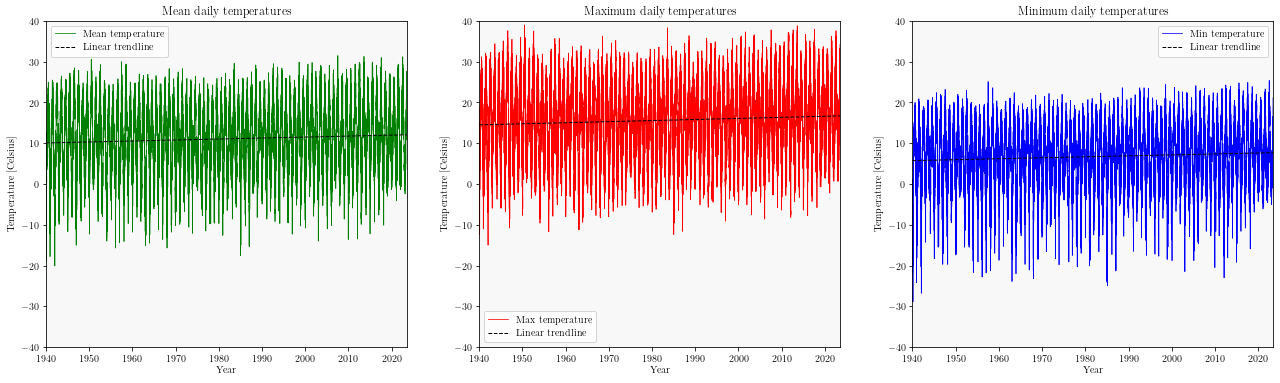

In [1358]:
# Plot minimum, maximum and average temperatures over the years
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
fig.set_figwidth(22)
fig.set_figheight(6)
ax1.plot(data["time"], data["temperature_2m_mean (°C)"], label="Mean temperature", color="green", linestyle="-", linewidth=0.75)
ax2.plot(data["time"], data["temperature_2m_max (°C)"], label="Max temperature", color="red", linestyle="-", linewidth=0.75)
ax3.plot(data["time"], data["temperature_2m_min (°C)"], label="Min temperature", color="blue", linestyle="-", linewidth=0.75)

# Set xlabel and ylabel names
ax1.set_xlabel("Year")
ax1.set_ylabel("Temperature [Celsius]")
ax2.set_xlabel("Year")
ax2.set_ylabel("Temperature [Celsius]")
ax3.set_xlabel("Year")
ax3.set_ylabel("Temperature [Celsius]")

# Set limits of x and y labels
ax1.set_xlim([dt.date(1940, 1, 1), dt.date(2023, 7, 15)])
ax1.set_ylim(-40, 40)
ax2.set_xlim([dt.date(1940, 1, 1), dt.date(2023, 7, 15)])
ax2.set_ylim(-40, 40)
ax3.set_xlim([dt.date(1940, 1, 1), dt.date(2023, 7, 15)])
ax3.set_ylim(-40, 40)

# Calculate linear trendlines
z_mean = np.polyfit(data["time"].dt.year, data["temperature_2m_mean (°C)"], 1)
p_mean = np.poly1d(z_mean)
z_max = np.polyfit(data["time"].dt.year, data["temperature_2m_max (°C)"], 1)
p_max = np.poly1d(z_max)
z_min = np.polyfit(data["time"].dt.year, data["temperature_2m_min (°C)"], 1)
p_min = np.poly1d(z_min)

# Plot trendlines
ax1.plot(data["time"], p_mean(data["time"].dt.year), color="black", linestyle="--", linewidth="1", label="Linear trendline")
ax2.plot(data["time"], p_max(data["time"].dt.year), color="black", linestyle="--", linewidth="1", label="Linear trendline")
ax3.plot(data["time"], p_min(data["time"].dt.year), color="black", linestyle="--", linewidth="1", label="Linear trendline")

# Plot legends
ax1.legend()
ax2.legend()
ax3.legend()

# Subplot titles
ax1.set_title("Mean daily temperatures")
ax2.set_title("Maximum daily temperatures")
ax3.set_title("Minimum daily temperatures")

ax1.set_facecolor("#F8F8F8")
ax2.set_facecolor("#F8F8F8")
ax3.set_facecolor("#F8F8F8")

# Save figure to pdf file
plt.savefig('daily_temperatures_per_year.pdf', bbox_inches='tight')

#### Day with maximum temperature in Zagreb

In [1359]:
# Get a day with maximum temperature in Zagreb
data[data["temperature_2m_max (°C)"] == data["temperature_2m_max (°C)"].max()]

,time,weathercode (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
3838,1950-07-05,0.0,39.0,21.5,30.6,39.4,23.1,31.5,1950-07-05T05:11,1950-07-05T20:48,0.0,0.0,0.0,0.0,7.9,20.2,213.0,28.23,6.87


#### Day with minimum temperature in Zagreb

In [1360]:
# Get a day with minimum temperature in Zagreb
data[data["temperature_2m_min (°C)"] == data["temperature_2m_min (°C)"].min()]

,time,weathercode (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
45,1940-02-15,1.0,-10.1,-28.9,-18.9,-14.8,-33.7,-23.6,1940-02-15T07:58,1940-02-15T18:21,0.0,0.0,0.0,0.0,8.8,17.6,241.0,12.32,0.55


#### Statistical characteristics of maximum daily temperature data (per every year)

In [1361]:
data.groupby(data["time"].dt.year)["temperature_2m_max (°C)"].describe()

,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
1940,365.0,12.996712,11.104120,-12.4,4.100,15.30,22.300,31.2
1941,365.0,13.944384,9.647801,-7.6,6.300,14.50,22.000,32.1
1942,365.0,14.205205,11.528958,-15.0,4.800,16.10,24.100,32.3
1943,365.0,15.847123,9.115042,-5.9,8.200,17.10,23.100,34.4
1944,366.0,14.944809,9.157778,-3.7,6.725,15.30,22.250,32.2
...,...,...,...,...,...,...,...,...
2019,365.0,17.256438,8.462727,-0.7,10.700,17.30,23.900,33.7
2020,366.0,17.094262,8.273628,0.1,10.600,17.95,23.875,33.2
2021,365.0,16.712603,9.044351,-2.2,9.500,15.60,24.500,36.2
